In [1]:
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
import numpy as np

# from matplotlib.mlab import bivariate_normal

import cartopy.crs as ccrs
import xarray as xr

import math

import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker
import matplotlib.gridspec as gridspec
from matplotlib.ticker import EngFormatter, StrMethodFormatter

import matplotlib

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

from IPython.display import Image

from tqdm import tqdm
import os 

In [2]:
Years = ["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009"]

Months = []
for imon in range(1,13): ### shw
    Months.append(str(imon).zfill(2))
    
Days = []
for iday in range(1,30,3):
    Days.append(str(iday).zfill(2))
    
print(Years)
print(Months)
print(Days)

['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
['01', '04', '07', '10', '13', '16', '19', '22', '25', '28']


In [3]:
Pressure = [100, 75, 65, 55, 47, 40, 30] # hPa
Height   = [16,  17.92, 18.87, 20, 21.05, 22.1, 24] # km


In [4]:
# Nx = 36
# Ny = 21
# Nz = 5
# N_parcel = 3780

Nx = 24
Ny = 21
Nz = 6+1
N_parcel = Nx*Ny*Nz
# if Nx*Ny*Nz!=N_parcel: print('ERROR: parcel number is wrong!')
    
N_year  = len(Years)
N_month = len(Months)
N_day   = len(Days)

lifetime   = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_N = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_S = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LON = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LAT = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

print(lifetime.shape)


Nz1 = 6
lifetime1   = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year))
lifetime1_N = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year))
lifetime1_S = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year))
LON1 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LAT1 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))


Nz2 = 1
lifetime2   = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year))
lifetime2_N = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year))
lifetime2_S = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year))
LON2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LAT2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

if Nz!=(Nz1+Nz2): print("Error: Nz=Nz1+Nz2!!!")    


(7, 21, 24, 10, 12, 10)


In [5]:
# for first 6 altitude injections

# directory1 = '../Lifetime/'
directory1 = '/n/home12/hongwei/Paper_3_QBO/Lifetime_New_Tropopause/Lifetime/'

filename1 = "Lifetime_"+Years[0]+Months[0]+Days[0]+".txt"
print(directory1+filename1)

for i_year in range(N_year):
    for i_month in tqdm(range(N_month)):
        for i_day in range(N_day):
            filename1 = "Lifetime_"+Years[i_year]+Months[i_month]+Days[i_day]+".txt"
            File1 = open(directory1+filename1, 'r')
        
            Lines1 = File1.readlines()

            # Strips the newline character
            data = []
            data_N = []
            data_S = []
            Longitude = []
            Latitude = []
            for line1 in Lines1:
                a1 = line1.split(',')
                data.append(float(a1[0]))
                data_N.append(float(a1[1]))
                data_S.append(float(a1[2]))
                Longitude.append(float(a1[3]))
                Latitude.append(float(a1[4]))
    
    
            i = 0
            for ix in range(Nx):
                for iy in range(Ny):
                    for iz in range(Nz1):
                        lifetime1[iz,iy,ix,i_day,i_month,i_year] = data[i]
                        lifetime1_N[iz,iy,ix,i_day,i_month,i_year] = data_N[i]
                        lifetime1_S[iz,iy,ix,i_day,i_month,i_year] = data_S[i]
                        
                        LON1[iz,iy,ix,i_day,i_month,i_year] = Longitude[i]
                        LAT1[iz,iy,ix,i_day,i_month,i_year] = Latitude[i]
                        
                        i = i+1

/n/home12/hongwei/Paper_3_QBO/Lifetime_New_Tropopause/Lifetime/Lifetime_20000101.txt


100%|██████████| 12/12 [00:09<00:00,  1.23it/s]


In [6]:
# for 21-km injection

directory2 = '../21km_post_process/Lifetime_21km/'
filename2 = "Lifetime_"+Years[0]+Months[0]+Days[0]+"_21km.txt"
print(directory2+filename2)

for i_year in range(N_year):
    for i_month in tqdm(range(N_month)):
        for i_day in range(N_day):
            filename2 = "Lifetime_"+Years[i_year]+Months[i_month]+Days[i_day]+"_21km.txt"
            File2 = open(directory2+filename2, 'r')
        
            Lines2 = File2.readlines()

            # Strips the newline character
            data = []
            data_N = []
            data_S = []
            Longitude = []
            Latitude = []
            for line2 in Lines2:
                a2 = line2.split(',')
                data.append(     float(a2[0]))
                data_N.append(   float(a2[1]))
                data_S.append(   float(a2[2]))
                Longitude.append(float(a2[3]))
                Latitude.append( float(a2[4]))
    
    
            i = 0
            for ix in range(Nx):
                for iy in range(Ny):
                    for iz in range(Nz2):
                        lifetime2[iz,iy,ix,i_day,i_month,i_year] = data[i]
                        lifetime2_N[iz,iy,ix,i_day,i_month,i_year] = data_N[i]
                        lifetime2_S[iz,iy,ix,i_day,i_month,i_year] = data_S[i]
                        
                        LON2[iz,iy,ix,i_day,i_month,i_year] = Longitude[i]
                        LAT2[iz,iy,ix,i_day,i_month,i_year] = Latitude[i]
                        
                        i = i+1

  0%|          | 0/12 [00:00<?, ?it/s]

../21km_post_process/Lifetime_21km/Lifetime_20000101_21km.txt


100%|██████████| 12/12 [00:04<00:00,  2.66it/s]


In [7]:
# Combine (1) 6 altitude injections and (2) 21-km injection

# Pressure = [100, 75, 65, 55, 47, 40, 30] # hPa
# Height   = [16,  18, 19, 20, 21, 22, 24] # km

lifetime[0:4,:,:,:,:,:]   = lifetime1[0:4,:,:,:,:,:]
lifetime_N[0:4,:,:,:,:,:] = lifetime1_N[0:4,:,:,:,:,:]
lifetime_S[0:4,:,:,:,:,:] = lifetime1_S[0:4,:,:,:,:,:]
LON[0:4,:,:,:,:,:] = LON1[0:4,:,:,:,:,:]
LAT[0:4,:,:,:,:,:] = LAT1[0:4,:,:,:,:,:]

# 21-km
lifetime[4,:,:,:,:,:]   = lifetime2[0,:,:,:,:,:]
lifetime_N[4,:,:,:,:,:] = lifetime2_N[0,:,:,:,:,:]
lifetime_S[4,:,:,:,:,:] = lifetime2_S[0,:,:,:,:,:]
LON[4,:,:,:,:,:] = LON2[0,:,:,:,:,:]
LAT[4,:,:,:,:,:] = LAT2[0,:,:,:,:,:]


lifetime[5:7,:,:,:,:,:]   = lifetime1[4:6,:,:,:,:,:]
lifetime_N[5:7,:,:,:,:,:] = lifetime1_N[4:6,:,:,:,:,:]
lifetime_S[5:7,:,:,:,:,:] = lifetime1_S[4:6,:,:,:,:,:]
LON[5:7,:,:,:,:,:] = LON1[4:6,:,:,:,:,:]
LAT[5:7,:,:,:,:,:] = LAT1[4:6,:,:,:,:,:]


In [8]:
# create seasonal data

N_season = 4

lifetime_season = np.zeros((Nz, Ny, Nx, N_season, N_year))
lifetime_N_season = np.zeros((Nz, Ny, Nx, N_season, N_year))
lifetime_S_season = np.zeros((Nz, Ny, Nx, N_season, N_year))

# for Winter
lifetime_season[:,:,:,0,:] = np.mean(lifetime[:,:,:,:,[0,1,11],:], axis=(3,4))
lifetime_N_season[:,:,:,0,:] = np.mean(lifetime_N[:,:,:,:,[0,1,11],:], axis=(3,4))
lifetime_S_season[:,:,:,0,:] = np.mean(lifetime_S[:,:,:,:,[0,1,11],:], axis=(3,4))

# for Spring, Summer and Autumn
for i in range(1,N_season):
    print(i,i*3-1,(i+1)*3-1)
    lifetime_season[:,:,:,i,:]   = np.mean( lifetime[:,:,:,:,i*3-1:(i+1)*3-1,:], axis=(3,4))
    lifetime_N_season[:,:,:,i,:] = np.mean( lifetime_N[:,:,:,:,i*3-1:(i+1)*3-1,:], axis=(3,4))
    lifetime_S_season[:,:,:,i,:] = np.mean( lifetime_S[:,:,:,:,i*3-1:(i+1)*3-1,:], axis=(3,4))


lifetime_season_mean   = np.zeros((Nz, Ny, Nx, N_season))
lifetime_N_season_mean = np.zeros((Nz, Ny, Nx, N_season))
lifetime_S_season_mean = np.zeros((Nz, Ny, Nx, N_season))

for i in range(0,N_season):
    lifetime_season_mean[:,:,:,i] = np.mean(lifetime_season[:,:,:,i,:], axis=3)
    lifetime_N_season_mean[:,:,:,i] = np.mean(lifetime_N_season[:,:,:,i,:], axis=3)
    lifetime_S_season_mean[:,:,:,i] = np.mean(lifetime_S_season[:,:,:,i,:], axis=3)




1 2 5
2 5 8
3 8 11


### Change the Lon and Lat order, and change the lifetime data order in corresponding to the Lon/Lat order

In [9]:
LON[0,0,:,0,0,0]

array([  0.,  15.,  30.,  45.,  60.,  75.,  90., 105., 120., 135., 150.,
       165., 180., 195., 210., 225., 240., 255., 270., 285., 300., 315.,
       330., 345.])

In [10]:
LON_1d = LON[0,0,:,0,0,0]
LAT_1d = LAT[0,:,0,0,0,0]

# First for LON: change (0,360) to (-180,180)

#################
# correst method 1:
#################

lifetime_season_new = np.zeros((Nz, Ny, Nx, N_season, N_year))

lifetime_season_mean_new = np.zeros((Nz, Ny, Nx, N_season))
lifetime_N_season_mean_new = np.zeros((Nz, Ny, Nx, N_season))
lifetime_S_season_mean_new = np.zeros((Nz, Ny, Nx, N_season))

print("LON Before: ", LON_1d)

for i in range(len(LON_1d)):
    if LON_1d[i]>=180: LON_1d[i] = LON_1d[i]-360

# sort
idx = np.argsort(LON_1d)
# print(idx)

LON_1d = LON_1d[idx]

lifetime_season_new = lifetime_season[:,:,idx,:,:]

lifetime_season_mean_new = lifetime_season_mean[:,:,idx,:]
lifetime_N_season_mean_new = lifetime_N_season_mean[:,:,idx,:]
lifetime_S_season_mean_new = lifetime_S_season_mean[:,:,idx,:]

print("LON After: ", LON_1d)

print("")
print(lifetime_season_mean_new.shape)


#################
# wrong method 2:
#################

# lifetime_season_mean_new = np.zeros((Nz, Ny, Nx, N_season))
# lifetime_N_season_mean_new = np.zeros((Nz, Ny, Nx, N_season))
# lifetime_S_season_mean_new = np.zeros((Nz, Ny, Nx, N_season))

# LON_1d = LON_1d - 180 ### shw ???
# lifetime_season_mean_new = lifetime_season_mean[:,:,:,:]
# lifetime_N_season_mean_new = lifetime_N_season_mean[:,:,:,:]
# lifetime_S_season_mean_new = lifetime_S_season_mean[:,:,:,:]

LON Before:  [  0.  15.  30.  45.  60.  75.  90. 105. 120. 135. 150. 165. 180. 195.
 210. 225. 240. 255. 270. 285. 300. 315. 330. 345.]
LON After:  [-180. -165. -150. -135. -120. -105.  -90.  -75.  -60.  -45.  -30.  -15.
    0.   15.   30.   45.   60.   75.   90.  105.  120.  135.  150.  165.]

(7, 21, 24, 4)


In [11]:
# Second for LAT: change (-30,30) to (30,-30)

lifetime_season_new2 = np.zeros((Nz, Ny, Nx, N_season, N_year))

lifetime_season_mean_new2 = np.zeros((Nz, Ny, Nx, N_season))
lifetime_N_season_mean_new2 = np.zeros((Nz, Ny, Nx, N_season))
lifetime_S_season_mean_new2 = np.zeros((Nz, Ny, Nx, N_season))


print("LAT Before: ", LAT_1d)
LAT_1d = LAT_1d[::-1]
print("LAT After: ", LAT_1d)

lifetime_season_new2 = lifetime_season_new[:,::-1,:,:,:]

lifetime_season_mean_new2 = lifetime_season_mean_new[:,::-1,:,:]
lifetime_N_season_mean_new2 = lifetime_N_season_mean_new[:,::-1,:,:]
lifetime_S_season_mean_new2 = lifetime_S_season_mean_new[:,::-1,:,:]

print("")
print(lifetime_season_mean_new.shape)

LAT Before:  [-30. -27. -24. -21. -18. -15. -12.  -9.  -6.  -3.   0.   3.   6.   9.
  12.  15.  18.  21.  24.  27.  30.]
LAT After:  [ 30.  27.  24.  21.  18.  15.  12.   9.   6.   3.   0.  -3.  -6.  -9.
 -12. -15. -18. -21. -24. -27. -30.]

(7, 21, 24, 4)


In [23]:
y_ids = np.arange(5,16,1)
print(y_ids)

L_19km = np.mean( lifetime_season_mean_new2[2,y_ids,:,:], axis=(0,1,2) )
L_19km/365.


[ 5  6  7  8  9 10 11 12 13 14 15]


694.830110479798

# *** important check ***

(1) The lat dimension should start from 20 and end at -20 for the input data in the following plotting code!!!

(2) The lon dimension should start from -180 and end at 180 for the input data in the following plotting code!!!


### calcualte the mean lifetime of selected regions in 18 km winter

In [12]:
ilon11 = 16
ilon12 = 20
LON_1d[ilon11:ilon12]

array([ 60.,  75.,  90., 105.])

In [13]:
ilon21 = 4
ilon22 = 8
LON_1d[ilon21:ilon22]

array([-120., -105.,  -90.,  -75.])

In [14]:
ilat1 = 7
ilat2 = 14
LAT_1d[ilat1:ilat2]

array([ 9.,  6.,  3.,  0., -3., -6., -9.])

In [15]:
#[1=18km, lat, lon, 0=winter]

Box_blue = np.mean(lifetime_season_mean_new2[1,ilat1:ilat2,ilon11:ilon12,0], axis=(0,1)) /365.25

Box_red = np.mean(lifetime_season_mean_new2[1,ilat1:ilat2,ilon21:ilon22,0], axis=(0,1)) /365.25

print(Box_red, Box_blue, (Box_red-Box_blue)/Box_blue)

print(f"Even in the same injection lat and altitude (18 km), \
particle lifetime from the red box can be more than 20% larger than that from blue box ")

1.1499967406538247 1.4270969003617873 -0.19417052874105054
Even in the same injection lat and altitude (18 km), particle lifetime from the red box can be more than 20% larger than that from blue box 


## The following figure is the final figure for the manuscript

17.92
0.7396577686516084
0.6604426192105864
1.4938626511521789
1.5470773442847363


(array([ 30.,  27.,  24.,  21.,  18.,  15.,  12.,   9.,   6.,   3.,   0.,
         -3.,  -6.,  -9., -12., -15., -18., -21., -24., -27., -30.]),
 array([-180., -165., -150., -135., -120., -105.,  -90.,  -75.,  -60.,
         -45.,  -30.,  -15.,    0.,   15.,   30.,   45.,   60.,   75.,
          90.,  105.,  120.,  135.,  150.,  165.]))

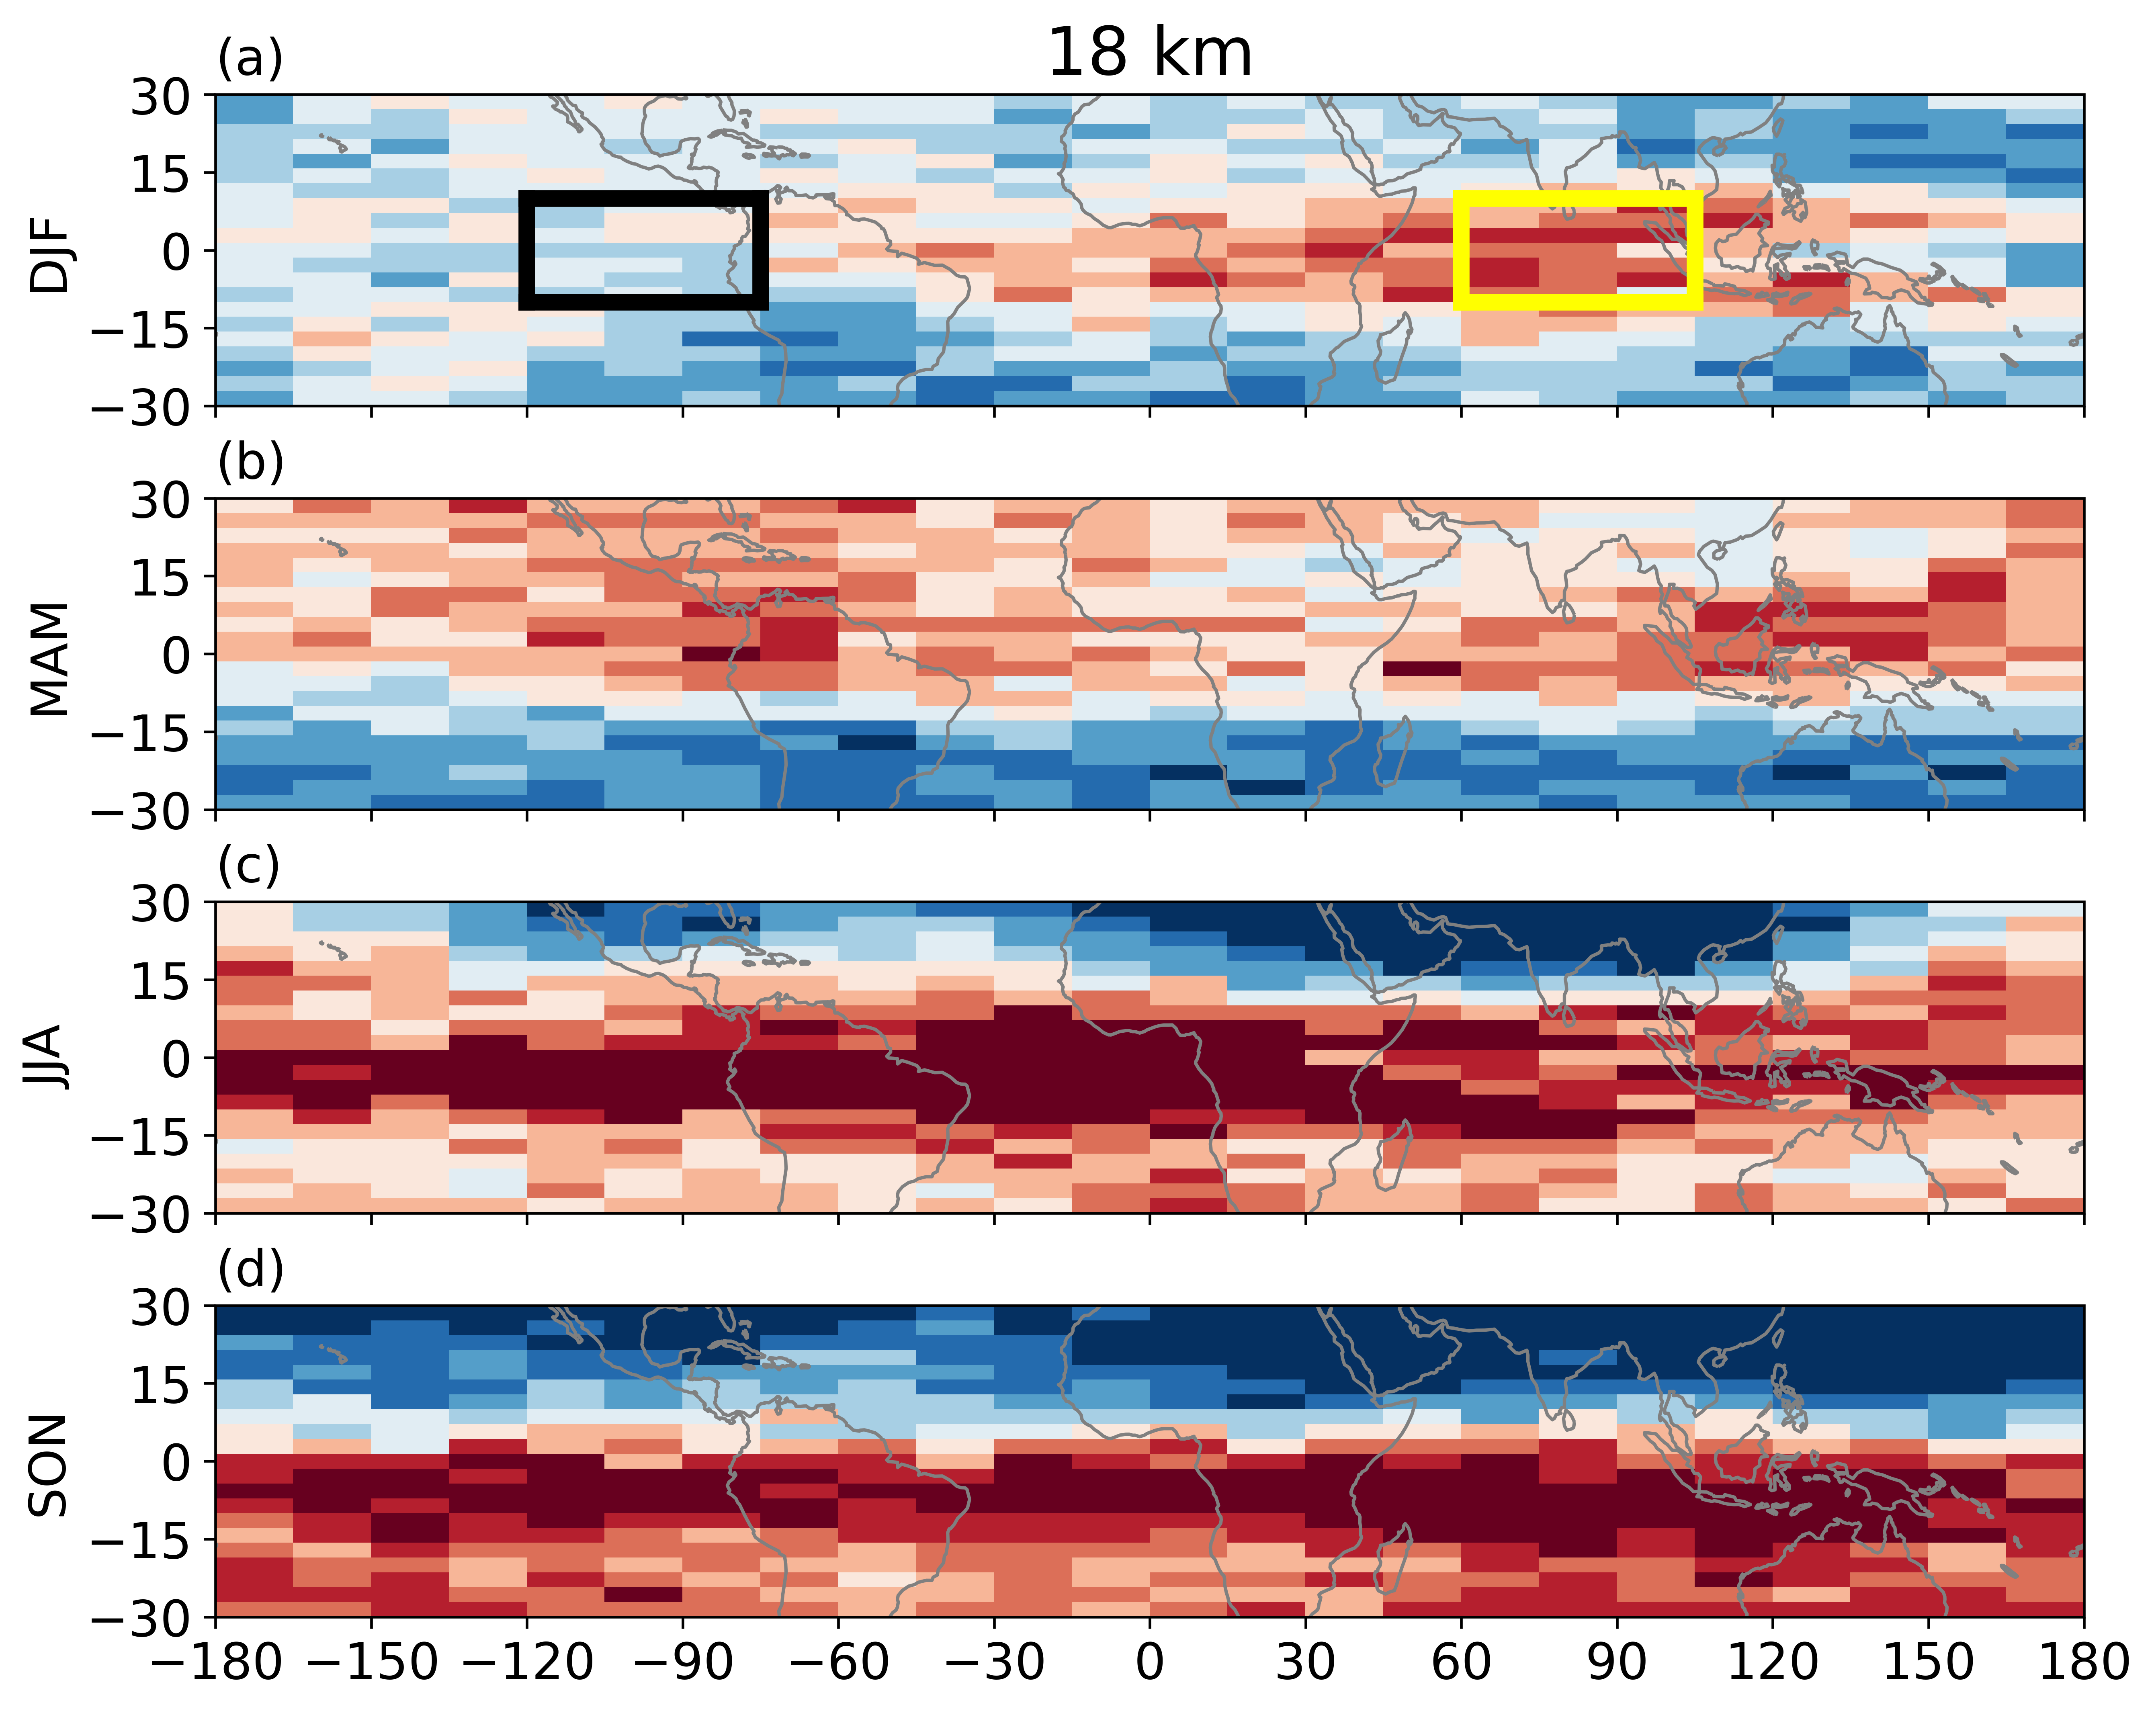

In [59]:
# Height   = [16,  18, 19, 20, 22, 24] # km

iz=1
print(Height[iz])

fig = plt.figure(figsize=(10,8.5), dpi=600)
projection = crs.PlateCarree()

if iz==0:
    Day_min = 50/365.25
    Day_max = 300/365.25 
if iz==1:
    Day_min = 0.7
    Day_max = 1.7 
if iz==2:
    Day_min = 300/365.25
    Day_max = 850/365.25  
if iz==3:
    Day_min = 400/365.25
    Day_max = 1100/365.25

extent = [-180 , 180 , -30 , 30]
cmap = matplotlib.cm.get_cmap('RdBu_r', 10)

###
ax1 = fig.add_subplot(4,1,1, projection=projection)

ax1.set_global()
ax1.set_extent(extent, crs=projection) ## Important
ax1.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax1_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,0]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap=cmap, interpolation='nearest')

### add box to mark the high/low lifetime center
if iz==1:
    ax1.plot([60, 105], [-10, -10], '-', color='yellow', linewidth=5)
    ax1.plot([60, 105], [10, 10], '-', color='yellow', linewidth=5)
    ax1.plot([60, 60], [-10, 10], '-', color='yellow', linewidth=5)
    ax1.plot([105, 105], [-10, 10], '-', color='yellow', linewidth=5)

    ax1.plot([-75, -120],  [-10, -10], 'k-', linewidth=5)
    ax1.plot([-75, -120],  [10, 10],   'k-', linewidth=5)
    ax1.plot([-75, -75],   [-10, 10],  'k-', linewidth=5)
    ax1.plot([-120, -120], [-10, 10],  'k-', linewidth=5)
    
# cb1 = plt.colorbar(ax1_pixel, ax=ax1)
# cb1.set_label('[year]', fontsize=12);

ax1.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax1.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax1.set_xticklabels([])
ax1.tick_params(axis='y', labelsize=15 )

ax1.set_title("18 km", fontsize=20)
ax1.set_ylabel("DJF", fontsize=15)
ax1.set_title("(a)", loc='left', fontsize=15)


# ax1.yaxis.set_major_formatter(EngFormatter(unit=u"°"))

###
ax2 = fig.add_subplot(4,1,2, projection=projection)

ax2.set_global()
ax2.set_extent(extent, crs=projection) ## Important
ax2.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax2_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,1]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap=cmap, interpolation='nearest')

# cb2 = plt.colorbar(ax2_pixel, ax=ax2)
# cb2.set_label('[years]', fontsize=12);

ax2.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax2.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax2.set_xticklabels([])
ax2.tick_params(axis='y', labelsize=15 )

ax2.set_ylabel("MAM", fontsize=15)
ax2.set_title("(b)", loc='left', fontsize=15)

###
ax3 = fig.add_subplot(4,1,3, projection=projection)

ax3.set_global()
ax3.set_extent(extent, crs=projection) ## Important
ax3.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax3_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,2]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap=cmap, interpolation='nearest')

# cb3 = plt.colorbar(ax3_pixel, ax=ax3)
# cb3.set_label('[year]', fontsize=12);

ax3.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax3.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax3.set_xticklabels([])
ax3.tick_params(axis='y', labelsize=15 )

ax3.set_ylabel("JJA", fontsize=15)
ax3.set_title("(c)", loc='left', fontsize=15)

###
ax4 = fig.add_subplot(4,1,4, projection=projection)

ax4.set_global()
ax4.set_extent(extent, crs=projection) ## Important
ax4.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax4_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,3]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap=cmap, interpolation='nearest')

# cb4 = plt.colorbar(ax4_pixel, ax=ax4, orientation="horizontal")
# cb4.set_label('Lifetime for (a)-(d) [year]', fontsize=15);
# cb4.ax.tick_params(labelsize=15)

ax4.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax4.set_yticks(np.linspace(-30, 30, 5), crs=projection)

ax4.tick_params(axis='x', labelsize=15 )
ax4.tick_params(axis='y', labelsize=15 )

ax4.set_ylabel("SON", fontsize=15)
ax4.set_title("(d)", loc='left', fontsize=15)


# plt.show()
plt.savefig('Figure_1a_18km.jpg')

print(lifetime_season_mean_new2[iz,0,0,3]/365.25)
print(lifetime_season_mean_new2[iz,0,-1,3]/365.25)
print(lifetime_season_mean_new2[iz,-1,0,3]/365.25)
print(lifetime_season_mean_new2[iz,-1,-1,3]/365.25,)

LAT_1d, LON_1d

17.92


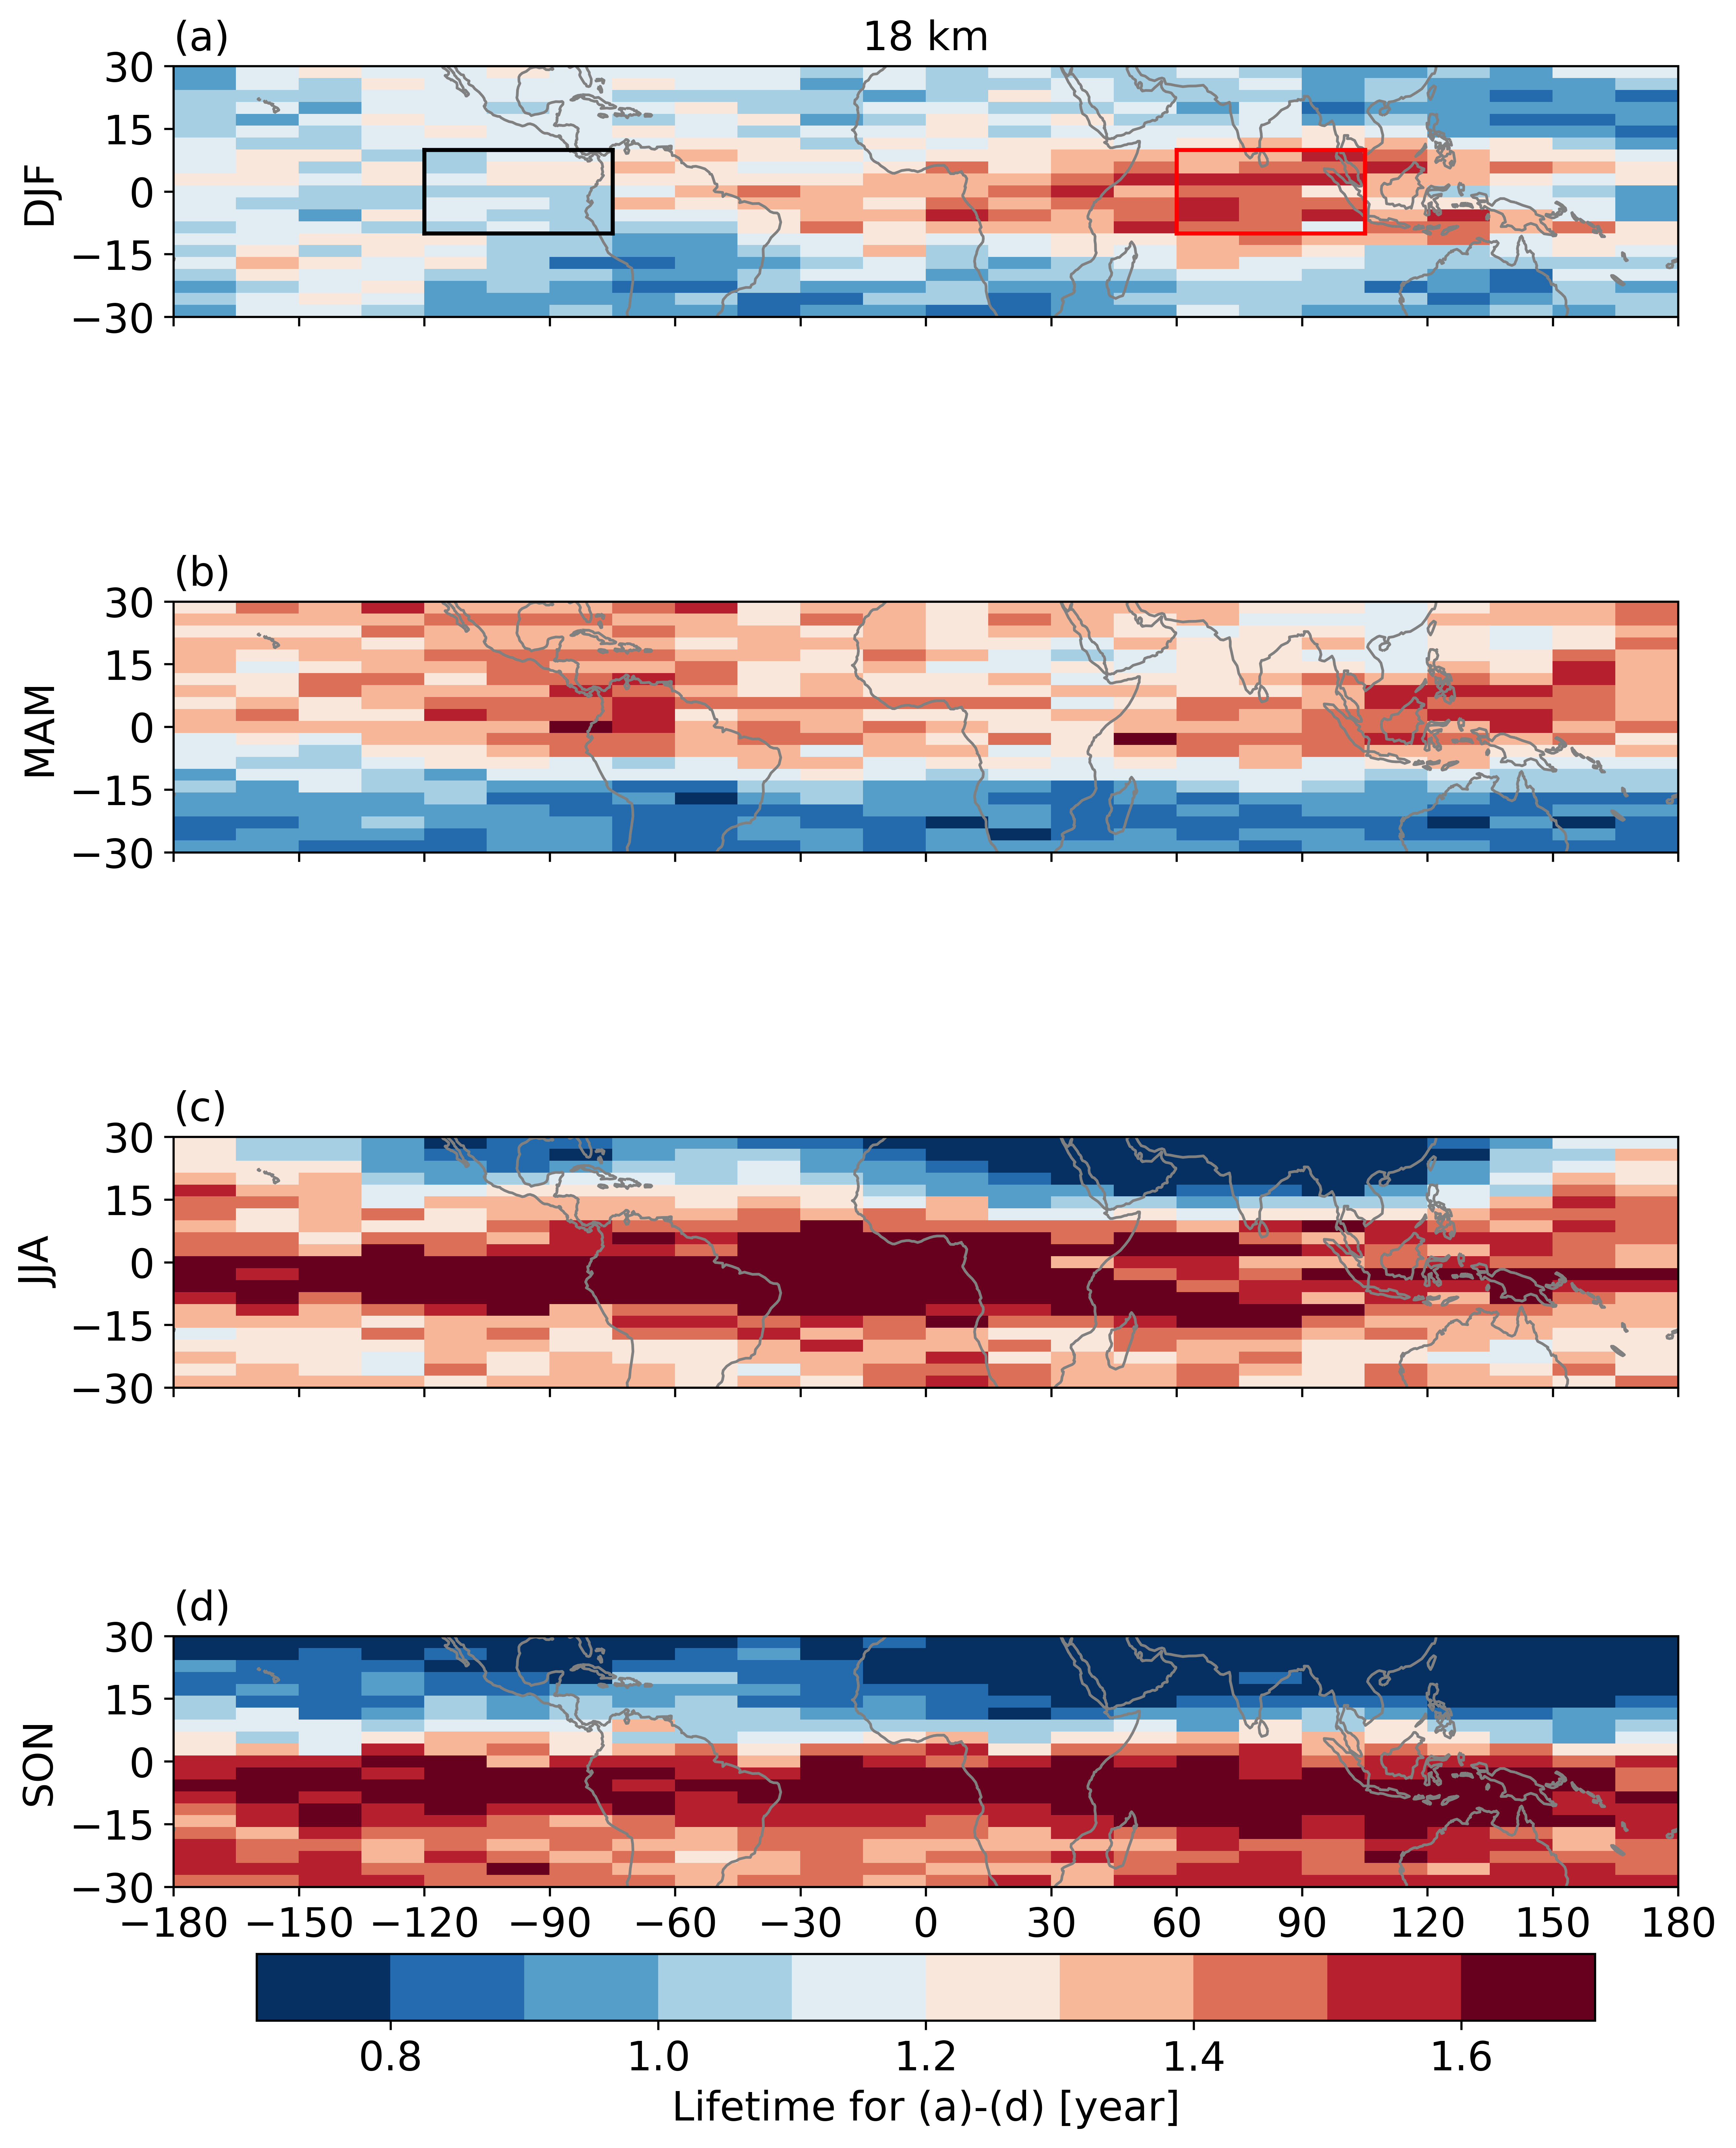

In [60]:
# Height   = [16,  18, 19, 20, 22, 24] # km

print(Height[iz])

fig = plt.figure(figsize=(10,14), dpi=600)
projection = crs.PlateCarree()
    

###
ax1 = fig.add_subplot(4,1,1, projection=projection)

ax1.set_global()
ax1.set_extent(extent, crs=projection) ## Important
ax1.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax1_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,0]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap=cmap, interpolation='nearest')

### add box to mark the high/low lifetime center
if iz==1:
    ax1.plot([60, 105], [-10, -10], 'r-')
    ax1.plot([60, 105], [10, 10], 'r-')
    ax1.plot([60, 60], [-10, 10], 'r-')
    ax1.plot([105, 105], [-10, 10], 'r-')

    ax1.plot([-75, -120],  [-10, -10], 'k-')
    ax1.plot([-75, -120],  [10, 10],   'k-')
    ax1.plot([-75, -75],   [-10, 10],  'k-')
    ax1.plot([-120, -120], [-10, 10],  'k-')
    
# cb1 = plt.colorbar(ax1_pixel, ax=ax1)
# cb1.set_label('[year]', fontsize=12);

ax1.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax1.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax1.set_xticklabels([])
ax1.tick_params(axis='y', labelsize=15 )

ax1.set_title("18 km", fontsize=15)
ax1.set_ylabel("DJF", fontsize=15)
ax1.set_title("(a)", loc='left', fontsize=15)


# ax1.yaxis.set_major_formatter(EngFormatter(unit=u"°"))

###
ax2 = fig.add_subplot(4,1,2, projection=projection)

ax2.set_global()
ax2.set_extent(extent, crs=projection) ## Important
ax2.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax2_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,1]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap=cmap, interpolation='nearest')

# cb2 = plt.colorbar(ax2_pixel, ax=ax2)
# cb2.set_label('[years]', fontsize=12);

ax2.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax2.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax2.set_xticklabels([])
ax2.tick_params(axis='y', labelsize=15 )

ax2.set_ylabel("MAM", fontsize=15)
ax2.set_title("(b)", loc='left', fontsize=15)

###
ax3 = fig.add_subplot(4,1,3, projection=projection)

ax3.set_global()
ax3.set_extent(extent, crs=projection) ## Important
ax3.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax3_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,2]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap=cmap, interpolation='nearest')

# cb3 = plt.colorbar(ax3_pixel, ax=ax3)
# cb3.set_label('[year]', fontsize=12);

ax3.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax3.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax3.set_xticklabels([])
ax3.tick_params(axis='y', labelsize=15 )

ax3.set_ylabel("JJA", fontsize=15)
ax3.set_title("(c)", loc='left', fontsize=15)

###
ax4 = fig.add_subplot(4,1,4, projection=projection)

ax4.set_global()
ax4.set_extent(extent, crs=projection) ## Important
ax4.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax4_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,3]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap=cmap, interpolation='nearest')

cb4 = plt.colorbar(ax4_pixel, ax=ax4, orientation="horizontal")
cb4.set_label('Lifetime for (a)-(d) [year]', fontsize=15);
cb4.ax.tick_params(labelsize=15)

ax4.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax4.set_yticks(np.linspace(-30, 30, 5), crs=projection)

ax4.tick_params(axis='x', labelsize=15 )
ax4.tick_params(axis='y', labelsize=15 )

ax4.set_ylabel("SON", fontsize=15)
ax4.set_title("(d)", loc='left', fontsize=15)

# fig.colorbar(ax=ax4, orientation='horizontal')
# plt.tight_layout()
# plt.colorbar()
# plt.set_label('[year]', fontsize=12)

# plt.show()
plt.savefig('Figure_1a_18km_colorbar.jpg')

20


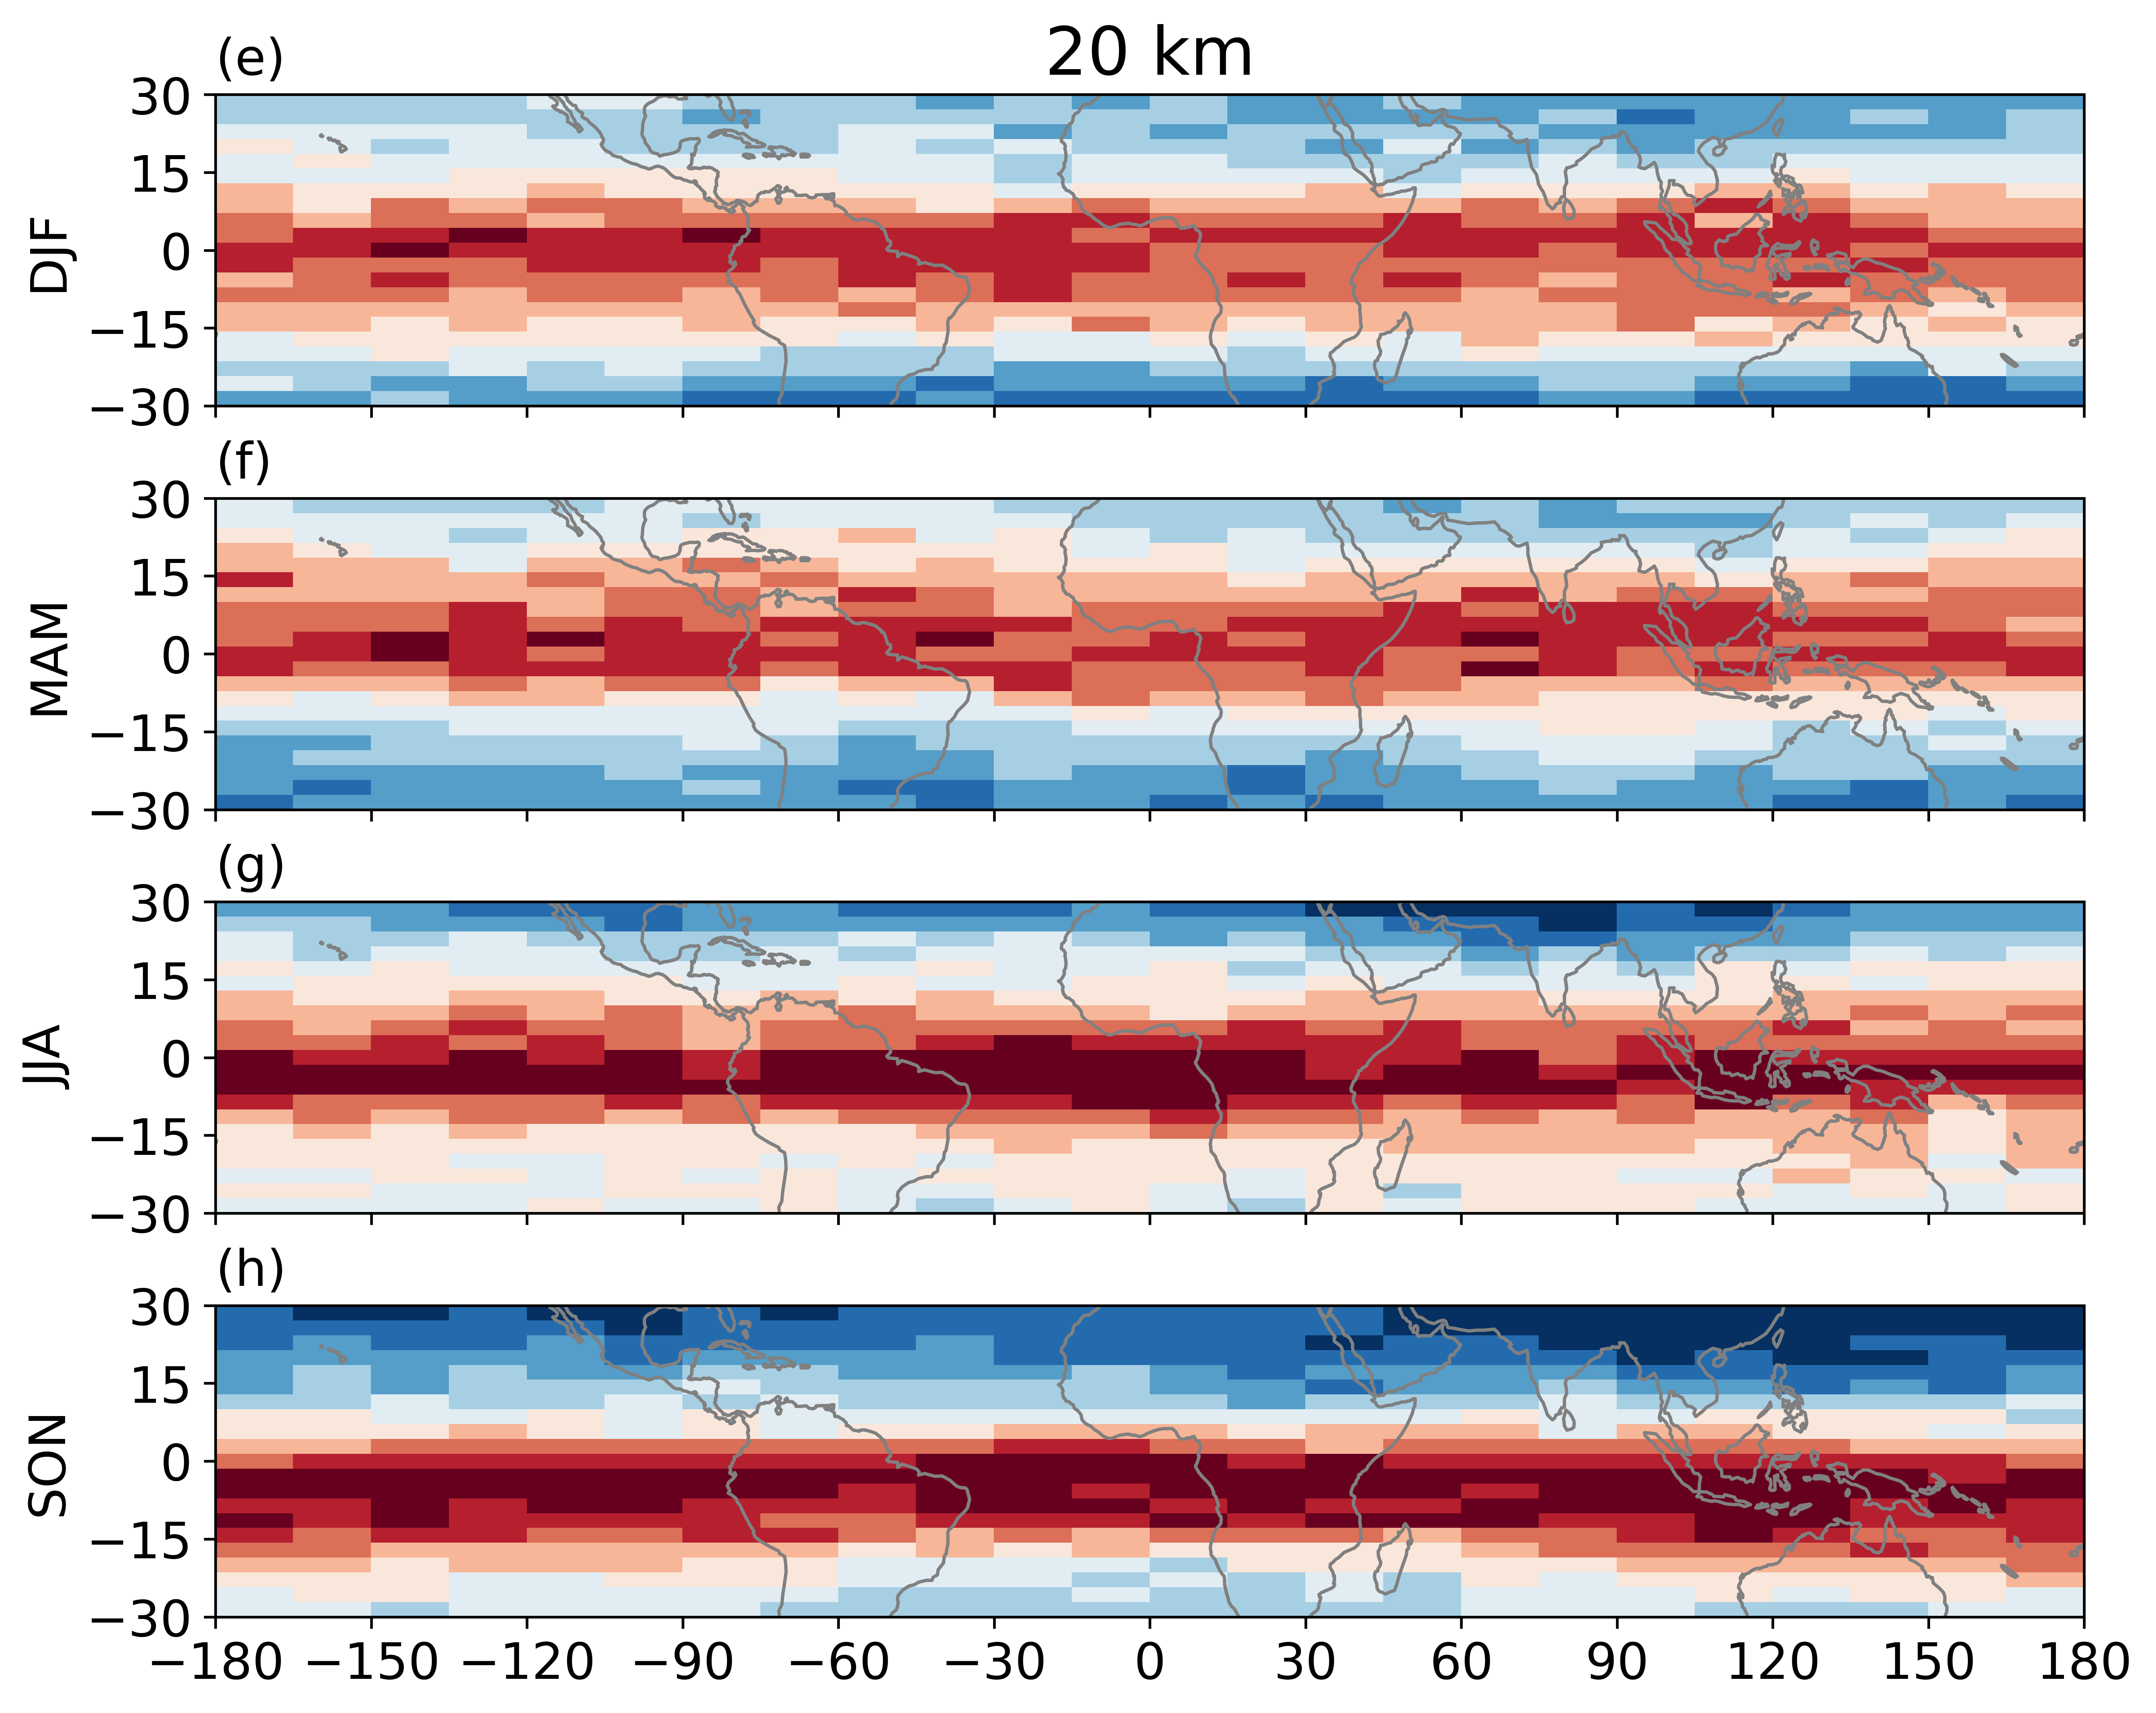

In [61]:
iz=3

print(Height[iz])

fig = plt.figure(figsize=(10,8.5), dpi=600)
projection = crs.PlateCarree()

if iz==0:
    Day_min = 50/365.25
    Day_max = 300/365.25 
if iz==1:
    Day_min = 250/365.25
    Day_max = 600/365.25 
if iz==2:
    Day_min = 300/365.25
    Day_max = 850/365.25  
if iz==3:
    Day_min = 1.0
    Day_max = 3.0
    

extent = [-180 , 180 , -30 , 30]

###
ax1 = fig.add_subplot(4,1,1, projection=projection)

ax1.set_global()
ax1.set_extent(extent, crs=projection) ## Important
ax1.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax1_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,0]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap=cmap, interpolation='nearest')

### add box to mark the high/low lifetime center
if iz==1:
    ax1.plot([60, 105], [-10, -10], 'r-')
    ax1.plot([60, 105], [10, 10], 'r-')
    ax1.plot([60, 60], [-10, 10], 'r-')
    ax1.plot([105, 105], [-10, 10], 'r-')

    ax1.plot([-75, -120],  [-10, -10], 'k-')
    ax1.plot([-75, -120],  [10, 10],   'k-')
    ax1.plot([-75, -75],   [-10, 10],  'k-')
    ax1.plot([-120, -120], [-10, 10],  'k-')
    
# cb1 = plt.colorbar(ax1_pixel, ax=ax1)
# cb1.set_label('[year]', fontsize=12);

ax1.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax1.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax1.set_xticklabels([])
ax1.tick_params(axis='y', labelsize=15 )

ax1.set_title("20 km", fontsize=20)
ax1.set_ylabel("DJF", fontsize=15)
ax1.set_title(f"(e)", loc='left', fontsize=15)


# ax1.yaxis.set_major_formatter(EngFormatter(unit=u"°"))

###
ax2 = fig.add_subplot(4,1,2, projection=projection)

ax2.set_global()
ax2.set_extent(extent, crs=projection) ## Important
ax2.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax2_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,1]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap=cmap, interpolation='nearest')

# cb2 = plt.colorbar(ax2_pixel, ax=ax2)
# cb2.set_label('[years]', fontsize=12);

ax2.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax2.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax2.set_xticklabels([])
ax2.tick_params(axis='y', labelsize=15 )

ax2.set_ylabel("MAM", fontsize=15)
ax2.set_title("(f)", loc='left', fontsize=15)

###
ax3 = fig.add_subplot(4,1,3, projection=projection)

ax3.set_global()
ax3.set_extent(extent, crs=projection) ## Important
ax3.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax3_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,2]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap=cmap, interpolation='nearest')

# cb3 = plt.colorbar(ax3_pixel, ax=ax3)
# cb3.set_label('[year]', fontsize=12);

ax3.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax3.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax3.set_xticklabels([])
ax3.tick_params(axis='y', labelsize=15 )

ax3.set_ylabel("JJA", fontsize=15)
ax3.set_title("(g)", loc='left', fontsize=15)

###
ax4 = fig.add_subplot(4,1,4, projection=projection)

ax4.set_global()
ax4.set_extent(extent, crs=projection) ## Important
ax4.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax4_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,3]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap=cmap, interpolation='nearest')

ax4.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax4.set_yticks(np.linspace(-30, 30, 5), crs=projection)

ax4.tick_params(axis='x', labelsize=15 )
ax4.tick_params(axis='y', labelsize=15 )

ax4.set_ylabel("SON", fontsize=15)
ax4.set_title("(h)", loc='left', fontsize=15)

# fig.colorbar(ax=ax4, orientation='horizontal')
# plt.tight_layout()
# plt.colorbar()
# plt.set_label('[year]', fontsize=12)

# plt.show()
plt.savefig('Figure_1a_20km.jpg')

20


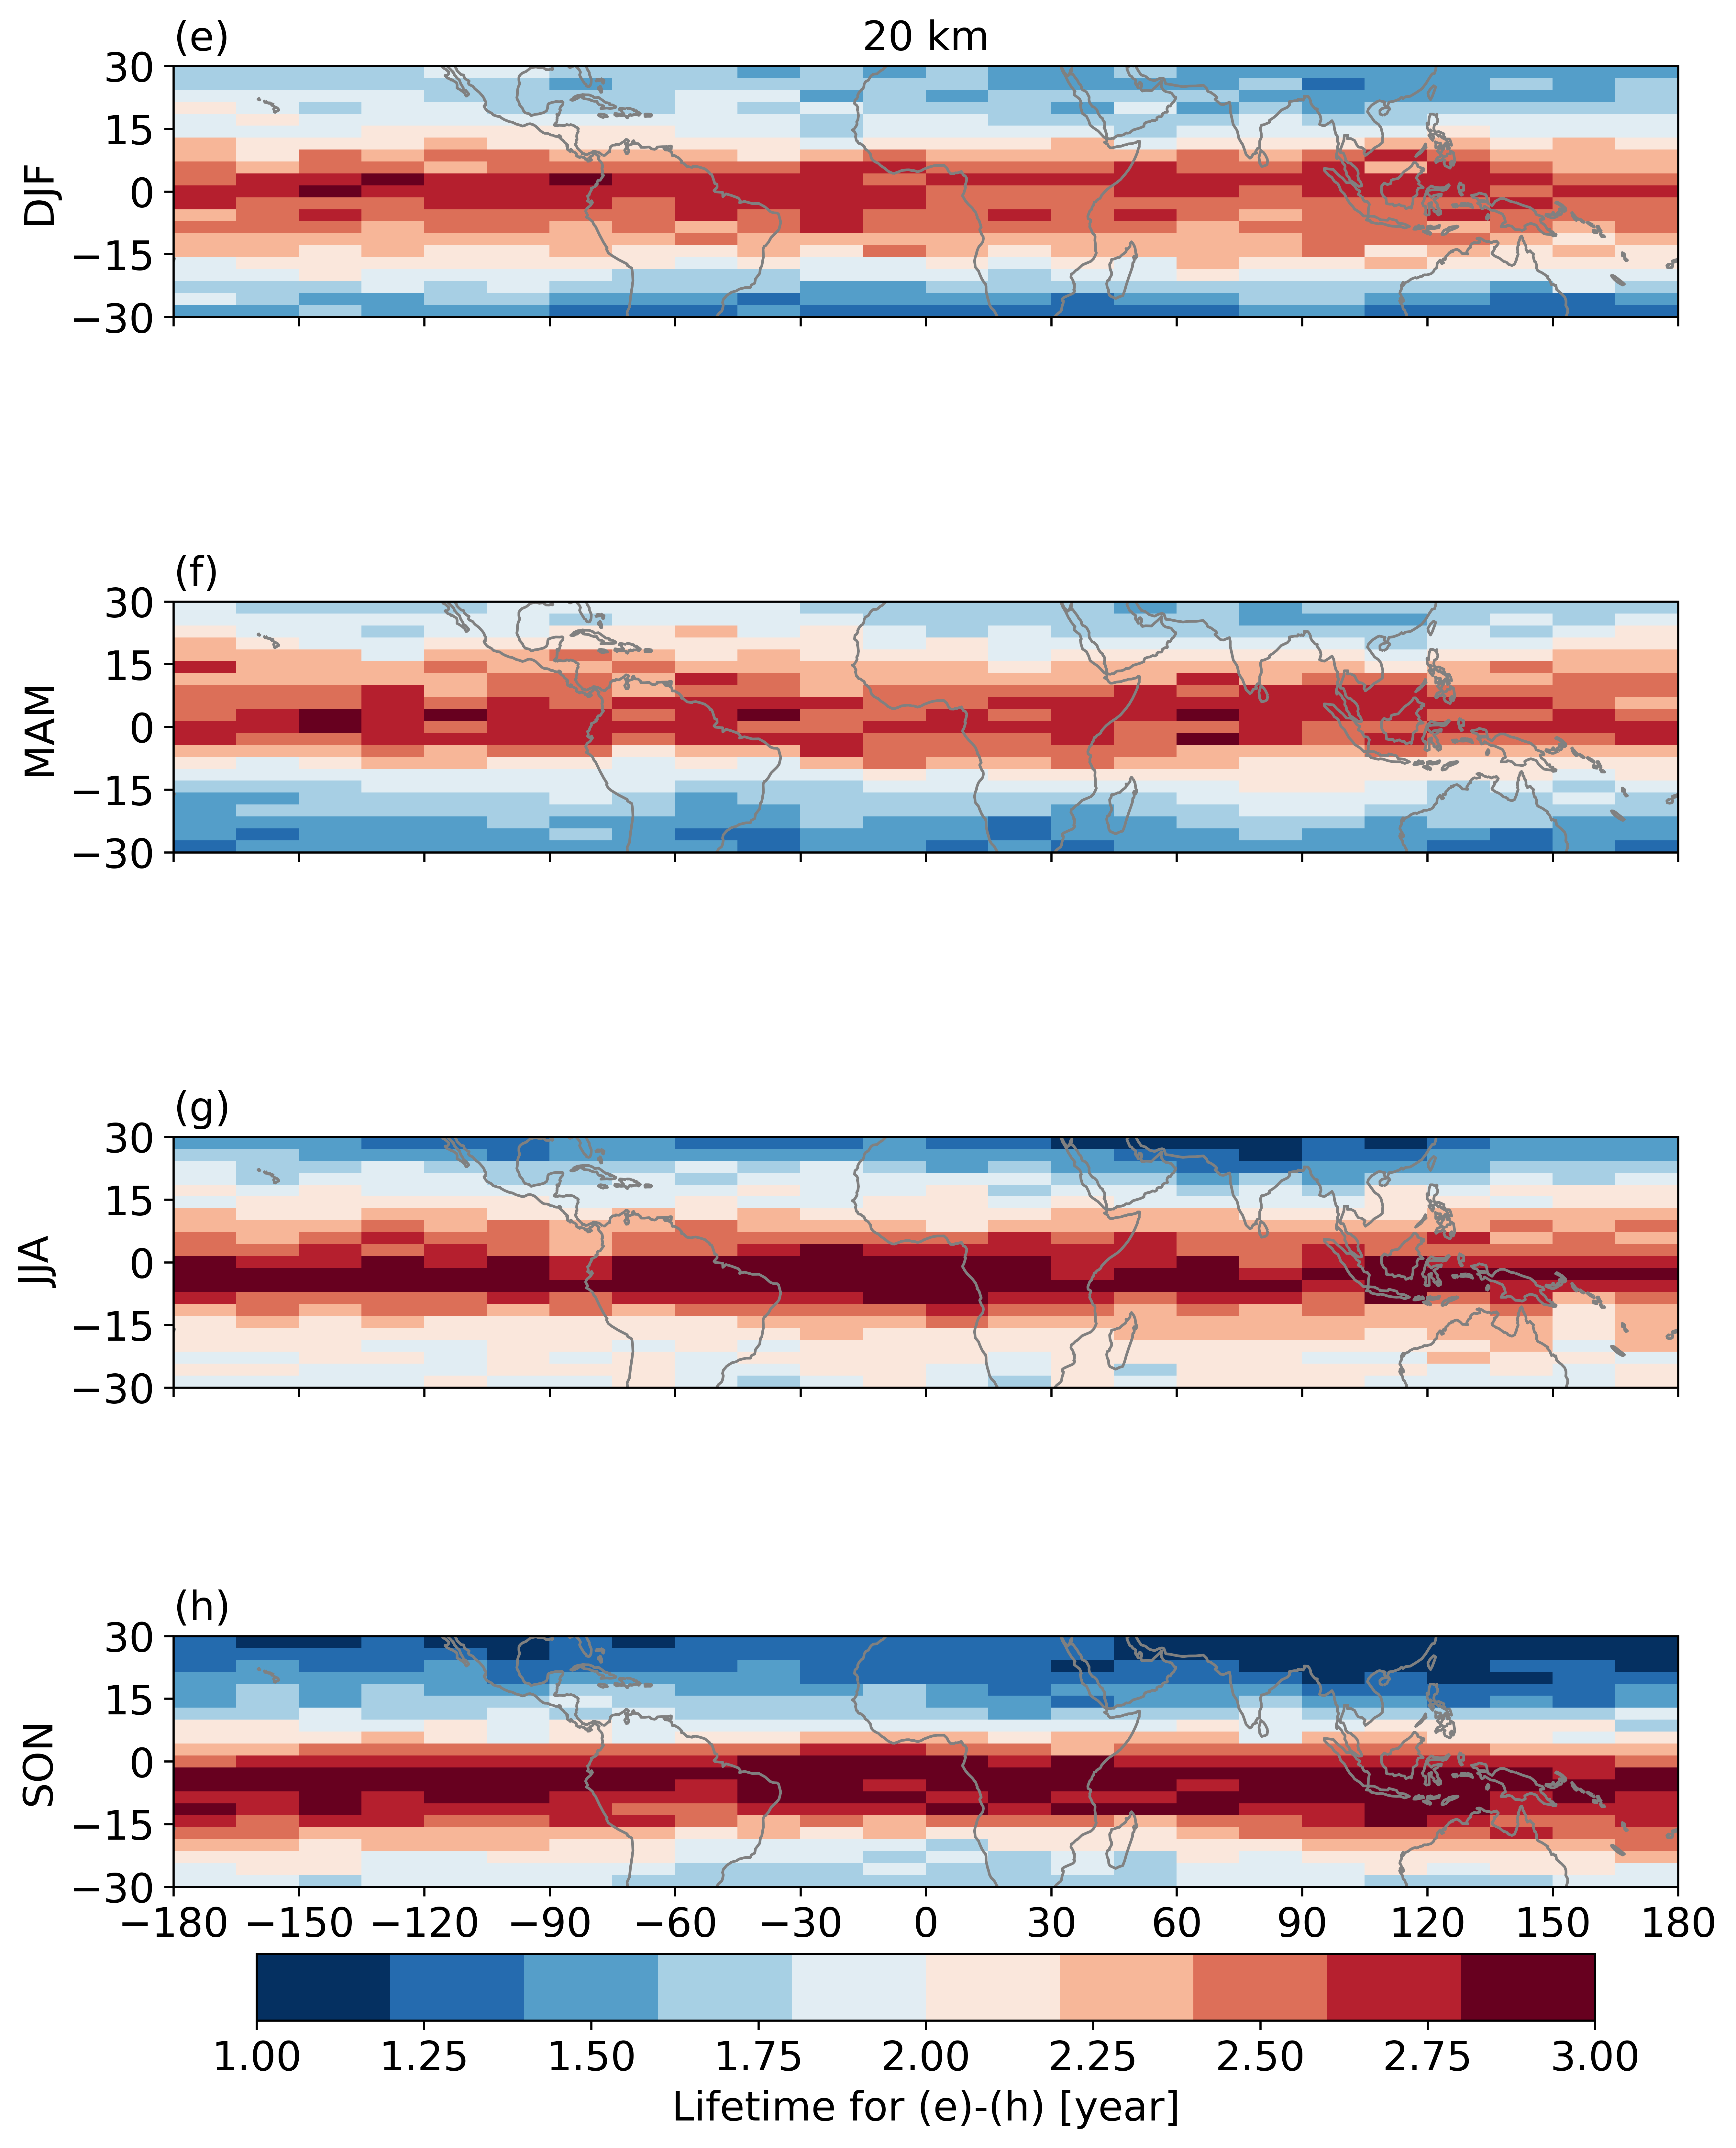

In [62]:

print(Height[iz])

fig = plt.figure(figsize=(10,14), dpi=600)
projection = crs.PlateCarree()

    
    
extent = [-180 , 180 , -30 , 30]

###
ax1 = fig.add_subplot(4,1,1, projection=projection)

ax1.set_global()
ax1.set_extent(extent, crs=projection) ## Important
ax1.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax1_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,0]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap=cmap, interpolation='nearest')

### add box to mark the high/low lifetime center
if iz==1:
    ax1.plot([60, 105], [-10, -10], 'r-')
    ax1.plot([60, 105], [10, 10], 'r-')
    ax1.plot([60, 60], [-10, 10], 'r-')
    ax1.plot([105, 105], [-10, 10], 'r-')

    ax1.plot([-75, -120],  [-10, -10], 'k-')
    ax1.plot([-75, -120],  [10, 10],   'k-')
    ax1.plot([-75, -75],   [-10, 10],  'k-')
    ax1.plot([-120, -120], [-10, 10],  'k-')
    
# cb1 = plt.colorbar(ax1_pixel, ax=ax1)
# cb1.set_label('[year]', fontsize=12);

ax1.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax1.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax1.set_xticklabels([])
ax1.tick_params(axis='y', labelsize=15 )

ax1.set_title("20 km", fontsize=15)
ax1.set_ylabel("DJF", fontsize=15)
ax1.set_title("(e)", loc='left', fontsize=15)


# ax1.yaxis.set_major_formatter(EngFormatter(unit=u"°"))

###
ax2 = fig.add_subplot(4,1,2, projection=projection)

ax2.set_global()
ax2.set_extent(extent, crs=projection) ## Important
ax2.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax2_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,1]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap=cmap, interpolation='nearest')

# cb2 = plt.colorbar(ax2_pixel, ax=ax2)
# cb2.set_label('[years]', fontsize=12);

ax2.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax2.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax2.set_xticklabels([])
ax2.tick_params(axis='y', labelsize=15 )

ax2.set_ylabel("MAM", fontsize=15)
ax2.set_title("(f)", loc='left', fontsize=15)

###
ax3 = fig.add_subplot(4,1,3, projection=projection)

ax3.set_global()
ax3.set_extent(extent, crs=projection) ## Important
ax3.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax3_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,2]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap=cmap, interpolation='nearest')

# cb3 = plt.colorbar(ax3_pixel, ax=ax3)
# cb3.set_label('[year]', fontsize=12);

ax3.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax3.set_yticks(np.linspace(-30, 30, 5), crs=projection)
ax3.set_xticklabels([])
ax3.tick_params(axis='y', labelsize=15 )

ax3.set_ylabel("JJA", fontsize=15)
ax3.set_title("(g)", loc='left', fontsize=15)

###
ax4 = fig.add_subplot(4,1,4, projection=projection)

ax4.set_global()
ax4.set_extent(extent, crs=projection) ## Important
ax4.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax4_pixel = plt.imshow(lifetime_season_mean_new2[iz,:,:,3]/365.25, vmin=Day_min, vmax=Day_max,\
           extent = extent, cmap=cmap, interpolation='nearest')

cb4 = plt.colorbar(ax4_pixel, ax=ax4, orientation="horizontal")
cb4.set_label('Lifetime for (e)-(h) [year]', fontsize=15);
cb4.ax.tick_params(labelsize=15)

ax4.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax4.set_yticks(np.linspace(-30, 30, 5), crs=projection)

ax4.tick_params(axis='x', labelsize=15 )
ax4.tick_params(axis='y', labelsize=15 )

ax4.set_ylabel("SON", fontsize=15)
ax4.set_title("(h)", loc='left', fontsize=15)

# fig.colorbar(ax=ax4, orientation='horizontal')
# plt.tight_layout()
# plt.colorbar()
# plt.set_label('[year]', fontsize=12)

# plt.show()
plt.savefig('Figure_1a_20km_colorbar.jpg')

# Figure 3: Zonal mean plot

In [44]:
# LON_1d = LON[0,0,:,0,0,0]
# LAT_1d = LAT[0,:,0,0,0,0]
# Pressure = [100, 75, 65, 55, 47, 40, 30] # hPa
# Height   = [16,  17.92, 18.87, 20, 21.05, 22.1, 24] # km

#lifetime_season_mean_new2 = np.zeros((Nz, Ny, Nx, N_season))

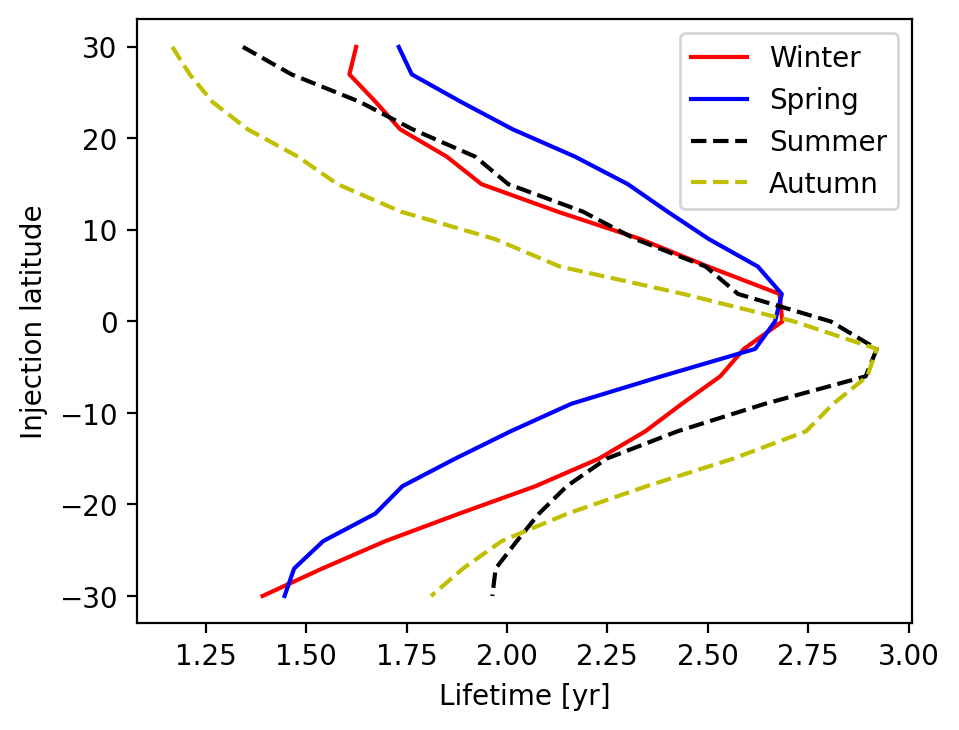

In [46]:
lifetime_season_zonal_mean2 = np.mean(lifetime_season_new2[:,:,:,:,:]/365.25, axis=2)

lifetime_season_zonal_mean = np.mean(lifetime_season_mean_new2[:,:,:,:]/365.25, axis=2)

fig = plt.figure(figsize=(5,4), dpi=200)

###
ax1 = fig.add_subplot(1,1,1)
iz=3
ax1.plot(lifetime_season_zonal_mean[iz,:,0], LAT_1d, 'r-', label=f"Winter")
ax1.plot(lifetime_season_zonal_mean[iz,:,1], LAT_1d, 'b-', label=f"Spring")
ax1.plot(lifetime_season_zonal_mean[iz,:,2], LAT_1d, 'k--', label=f'Summer')
ax1.plot(lifetime_season_zonal_mean[iz,:,3], LAT_1d, 'y--', label=f'Autumn')

# ax1.set_title(f"{Height[iz]:.0f} km")
ax1.set_xlabel("Lifetime [yr]")
ax1.set_ylabel("Injection latitude")
ax1.legend();

# plt.savefig('Figure_2a.jpg')

In [47]:
lifetime_season_zonal_mean2.shape

(7, 21, 4, 10)

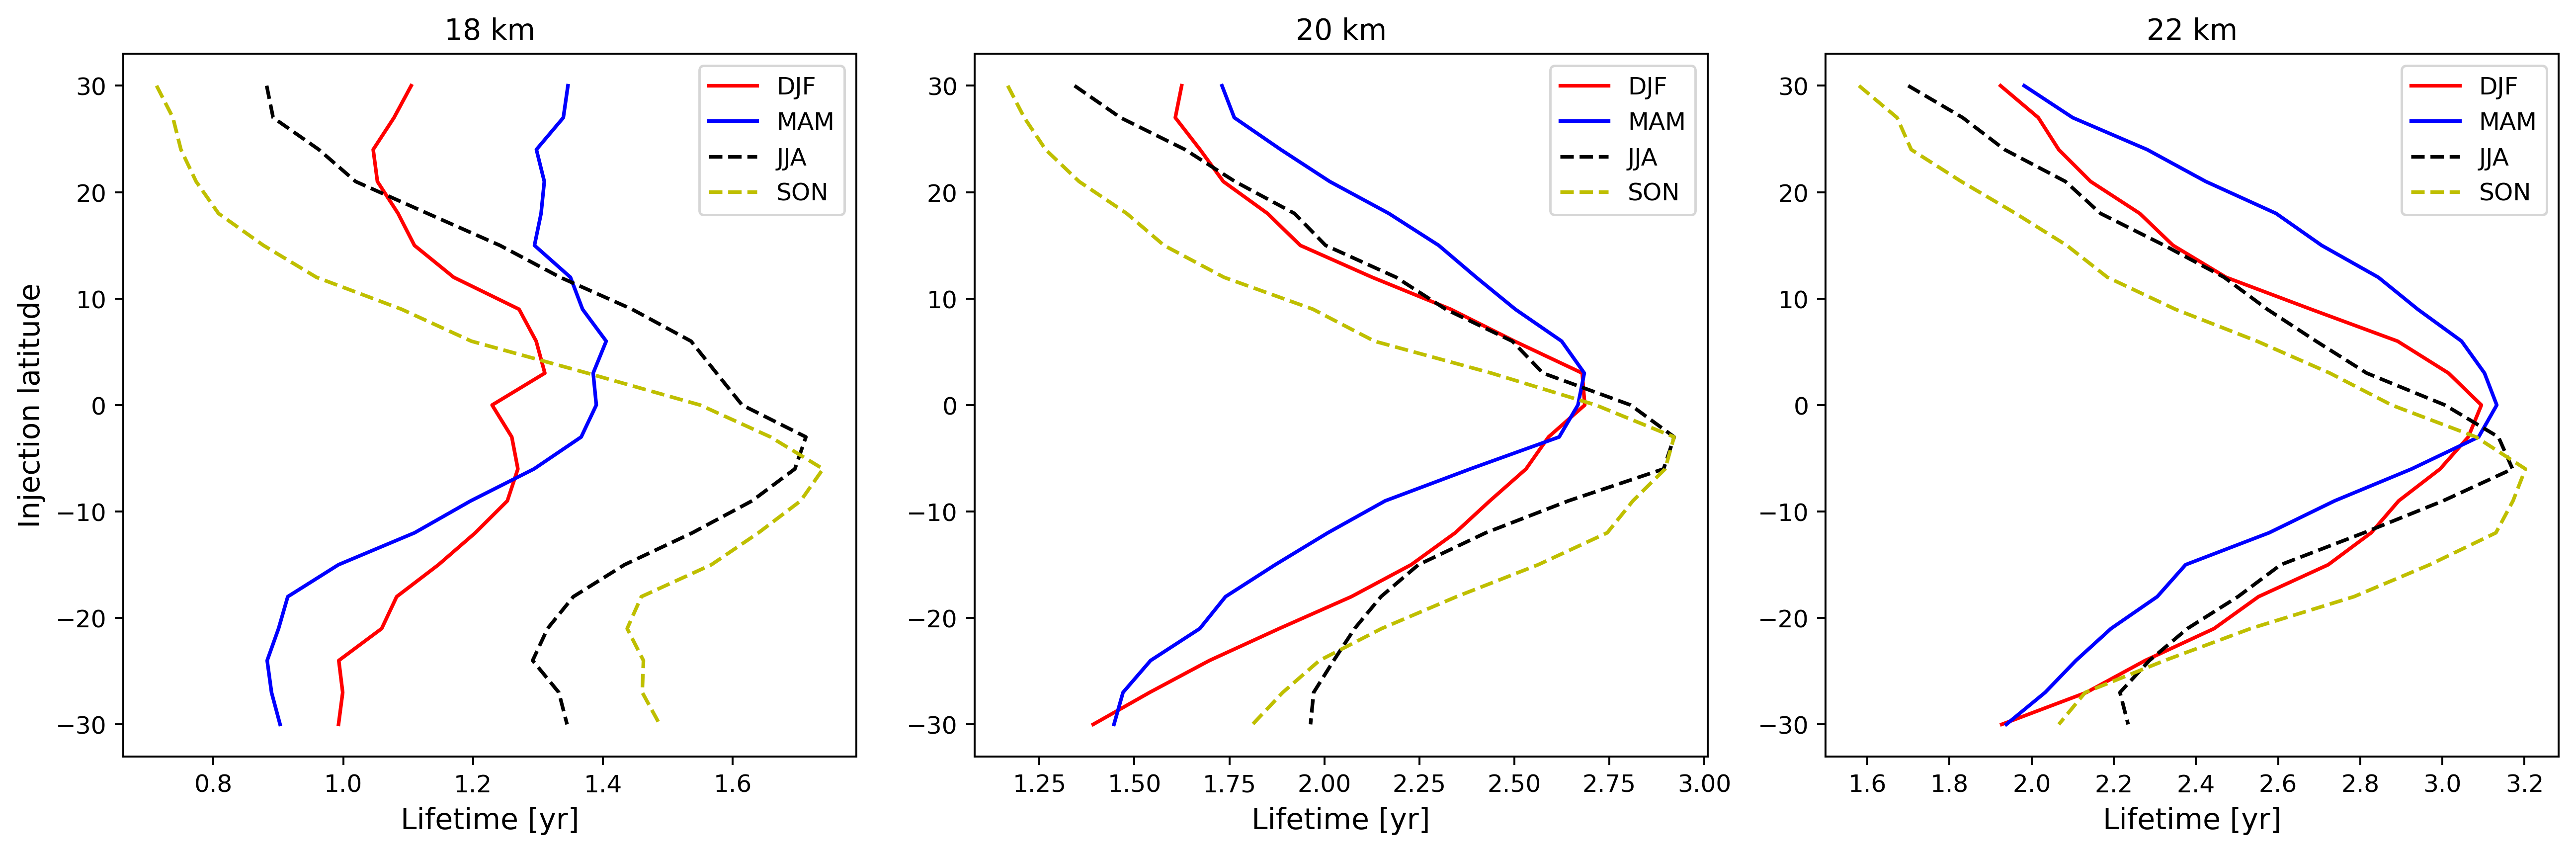

In [57]:
lifetime_season_zonal_mean = np.mean(lifetime_season_mean_new2[:,:,:,:]/365.25, axis=2)

fig = plt.figure(figsize=(15,5), dpi=350)

###
ax1 = fig.add_subplot(1,3,1)
iz=1
ax1.plot(lifetime_season_zonal_mean[iz,:,0], LAT_1d, 'r-', label=f"DJF")
ax1.plot(lifetime_season_zonal_mean[iz,:,1], LAT_1d, 'b-', label=f"MAM")
ax1.plot(lifetime_season_zonal_mean[iz,:,2], LAT_1d, 'k--', label=f'JJA')
ax1.plot(lifetime_season_zonal_mean[iz,:,3], LAT_1d, 'y--', label=f'SON')

ax1.set_title(f"{Height[iz]:.0f} km", fontsize=12)
ax1.set_xlabel("Lifetime [yr]", fontsize=12)
ax1.set_ylabel("Injection latitude", fontsize=12)
ax1.legend();


###
ax2 = fig.add_subplot(1,3,2)
iz=3
ax2.plot(lifetime_season_zonal_mean[iz,:,0], LAT_1d, 'r-', label=f"DJF")
ax2.plot(lifetime_season_zonal_mean[iz,:,1], LAT_1d, 'b-', label=f"MAM")
ax2.plot(lifetime_season_zonal_mean[iz,:,2], LAT_1d, 'k--', label=f'JJA')
ax2.plot(lifetime_season_zonal_mean[iz,:,3], LAT_1d, 'y--', label=f'SON')

ax2.set_title(f"{Height[iz]:.0f} km", fontsize=12)
ax2.set_xlabel("Lifetime [yr]", fontsize=12)
# ax2.set_ylabel("Injection latitude")
ax2.legend();


###
ax3 = fig.add_subplot(1,3,3)
iz=5
ax3.plot(lifetime_season_zonal_mean[iz,:,0], LAT_1d, 'r-', label=f"DJF")
ax3.plot(lifetime_season_zonal_mean[iz,:,1], LAT_1d, 'b-', label=f"MAM")
ax3.plot(lifetime_season_zonal_mean[iz,:,2], LAT_1d, 'k--', label=f'JJA')
ax3.plot(lifetime_season_zonal_mean[iz,:,3], LAT_1d, 'y--', label=f'SON')

ax3.set_title(f"{Height[iz]:.0f} km", fontsize=12)
ax3.set_xlabel("Lifetime [yr]", fontsize=12)
# ax3.set_ylabel("Injection latitude")
ax3.legend();

plt.tight_layout()

plt.savefig('Figure_S2.jpg')

### tropopause height

In [49]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
import pandas as pd

import scipy.constants

In [50]:
folder = '/n/home12/hongwei/Paper_2/Plot_python/Tropopause_height'

ds01 = xr.open_dataset(folder+'/ERA5_monmean_01.nc')
ds02 = xr.open_dataset(folder+'/ERA5_monmean_02.nc')
ds03 = xr.open_dataset(folder+'/ERA5_monmean_03.nc')
ds04 = xr.open_dataset(folder+'/ERA5_monmean_04.nc')
ds05 = xr.open_dataset(folder+'/ERA5_monmean_05.nc')
ds06 = xr.open_dataset(folder+'/ERA5_monmean_06.nc')
ds07 = xr.open_dataset(folder+'/ERA5_monmean_07.nc')
ds08 = xr.open_dataset(folder+'/ERA5_monmean_08.nc')
ds09 = xr.open_dataset(folder+'/ERA5_monmean_09.nc')
ds10 = xr.open_dataset(folder+'/ERA5_monmean_10.nc')
ds11 = xr.open_dataset(folder+'/ERA5_monmean_11.nc')
ds12 = xr.open_dataset(folder+'/ERA5_monmean_12.nc')

ds01

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 601, lon: 1200, time: 1)
Coordinates:
  * time       (time) datetime64[ns] 2011-07-17T23:30:00
  * lon        (lon) float64 -180.0 -179.7 -179.4 -179.1 ... 179.1 179.4 179.7
  * lat        (lat) float64 -90.0 -89.7 -89.4 -89.1 ... 89.1 89.4 89.7 90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    clp_z      (time, lat, lon) float32 ...
    clp_p      (time, lat, lon) float32 ...
    clp_t      (time, lat, lon) float32 ...
    clp_q      (time, lat, lon) float32 ...
    dyn_z      (time, lat, lon) float32 ...
    dyn_p      (time, lat, lon) float32 ...
    dyn_t      (time, lat, lon) float32 ...
    dyn_q      (time, lat, lon) float32 ...
    wmo_1st_z  (time, lat, lon) float32 ...
    wmo_1st_p  (time, lat, lon) float32 ...
    wmo_1st_t  (time, lat, lon) float32 ...
    wmo_1st_q  (time, lat, lon) float32 ...
    wmo_2nd_z  (time, lat, lon) float32 ...
    wmo_2nd_p  (time, lat, lon) float32 ...
    wmo_2nd_t  (time, lat, lon) float32 ...
    wmo_2nd_q  (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri May 20 13:53:38 2022: cdo timavg -cat era5_*_monmean01....
    frequency:    mon
    CDO:          Climate Data Operators version 1.9.9 (https://mpimet.mpg.de...

In [51]:
TROP01_z = ds01["wmo_1st_z"]
TROP02_z = ds02["wmo_1st_z"]
TROP03_z = ds03["wmo_1st_z"]
TROP04_z = ds04["wmo_1st_z"]
TROP05_z = ds05["wmo_1st_z"]
TROP06_z = ds06["wmo_1st_z"]
TROP07_z = ds07["wmo_1st_z"]
TROP08_z = ds08["wmo_1st_z"]
TROP09_z = ds09["wmo_1st_z"]
TROP10_z = ds10["wmo_1st_z"]
TROP11_z = ds11["wmo_1st_z"]
TROP12_z = ds12["wmo_1st_z"]

TROP01_dyn = ds01["dyn_z"]
TROP02_dyn = ds02["dyn_z"]
TROP03_dyn = ds03["dyn_z"]
TROP04_dyn = ds04["dyn_z"]
TROP05_dyn = ds05["dyn_z"]
TROP06_dyn = ds06["dyn_z"]
TROP07_dyn = ds07["dyn_z"]
TROP08_dyn = ds08["dyn_z"]
TROP09_dyn = ds09["dyn_z"]
TROP10_dyn = ds10["dyn_z"]
TROP11_dyn = ds11["dyn_z"]
TROP12_dyn = ds12["dyn_z"]


### zonal+time mean
TROP01_Xmean_z = TROP01_z.mean(dim=['lon','time'])
TROP02_Xmean_z = TROP02_z.mean(dim=['lon','time'])
TROP03_Xmean_z = TROP03_z.mean(dim=['lon','time'])
TROP04_Xmean_z = TROP04_z.mean(dim=['lon','time'])
TROP05_Xmean_z = TROP05_z.mean(dim=['lon','time'])
TROP06_Xmean_z = TROP06_z.mean(dim=['lon','time'])
TROP07_Xmean_z = TROP07_z.mean(dim=['lon','time'])
TROP08_Xmean_z = TROP08_z.mean(dim=['lon','time'])
TROP09_Xmean_z = TROP09_z.mean(dim=['lon','time'])
TROP10_Xmean_z = TROP10_z.mean(dim=['lon','time'])
TROP11_Xmean_z = TROP11_z.mean(dim=['lon','time'])
TROP12_Xmean_z = TROP12_z.mean(dim=['lon','time'])

TROP01_Xmean_dyn = TROP01_dyn.mean(dim=['lon','time'])
TROP02_Xmean_dyn = TROP02_dyn.mean(dim=['lon','time'])
TROP03_Xmean_dyn = TROP03_dyn.mean(dim=['lon','time'])
TROP04_Xmean_dyn = TROP04_dyn.mean(dim=['lon','time'])
TROP05_Xmean_dyn = TROP05_dyn.mean(dim=['lon','time'])
TROP06_Xmean_dyn = TROP06_dyn.mean(dim=['lon','time'])
TROP07_Xmean_dyn = TROP07_dyn.mean(dim=['lon','time'])
TROP08_Xmean_dyn = TROP08_dyn.mean(dim=['lon','time'])
TROP09_Xmean_dyn = TROP09_dyn.mean(dim=['lon','time'])
TROP10_Xmean_dyn = TROP10_dyn.mean(dim=['lon','time'])
TROP11_Xmean_dyn = TROP11_dyn.mean(dim=['lon','time'])
TROP12_Xmean_dyn = TROP12_dyn.mean(dim=['lon','time'])

lat = ds01["lat"]
lon = ds01["lon"]

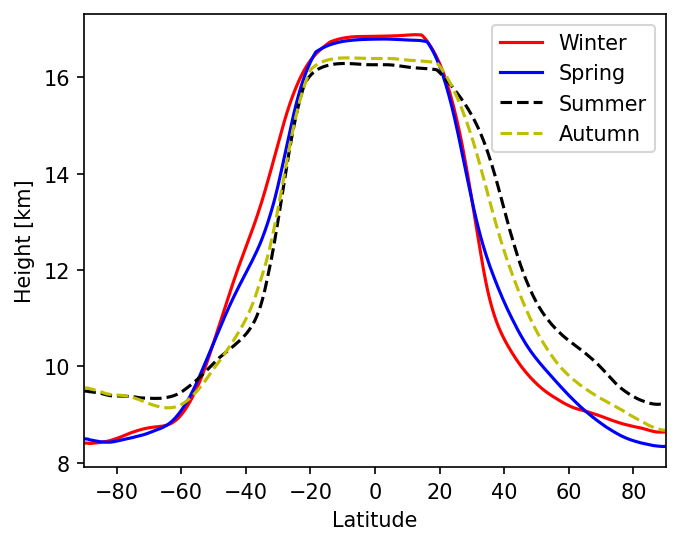

In [52]:

Z1 = np.minimum((TROP12_Xmean_z[:]+TROP01_Xmean_z[:]+TROP02_Xmean_z[:])/3.0, \
         (TROP12_Xmean_dyn[:]+TROP01_Xmean_dyn[:]+TROP02_Xmean_dyn[:])/3.0)

Z2 = np.minimum((TROP03_Xmean_z[:]+TROP04_Xmean_z[:]+TROP05_Xmean_z[:])/3.0, \
         (TROP03_Xmean_dyn[:]+TROP04_Xmean_dyn[:]+TROP05_Xmean_dyn[:])/3.0)

Z3 = np.minimum((TROP06_Xmean_z[:]+TROP07_Xmean_z[:]+TROP08_Xmean_z[:])/3.0, \
         (TROP06_Xmean_dyn[:]+TROP07_Xmean_dyn[:]+TROP08_Xmean_dyn[:])/3.0)

Z4 = np.minimum((TROP09_Xmean_z[:]+TROP10_Xmean_z[:]+TROP11_Xmean_z[:])/3.0, \
         (TROP09_Xmean_dyn[:]+TROP10_Xmean_dyn[:]+TROP11_Xmean_dyn[:])/3.0)


figure = plt.figure(figsize=(5,4), dpi=150)


plt.plot(lat, Z1, 'r-', label='Winter');
plt.plot(lat, Z2, 'b-', label='Spring');
plt.plot(lat, Z3, 'k--', label='Summer');
plt.plot(lat, Z4, 'y--', label='Autumn');

plt.xlim(-90,90)
# plt.ylim(90,340)

# plt.gca().invert_yaxis()


# plt.title('Tropopause Height')
plt.xlabel('Latitude')
plt.ylabel('Height [km]')

plt.legend();

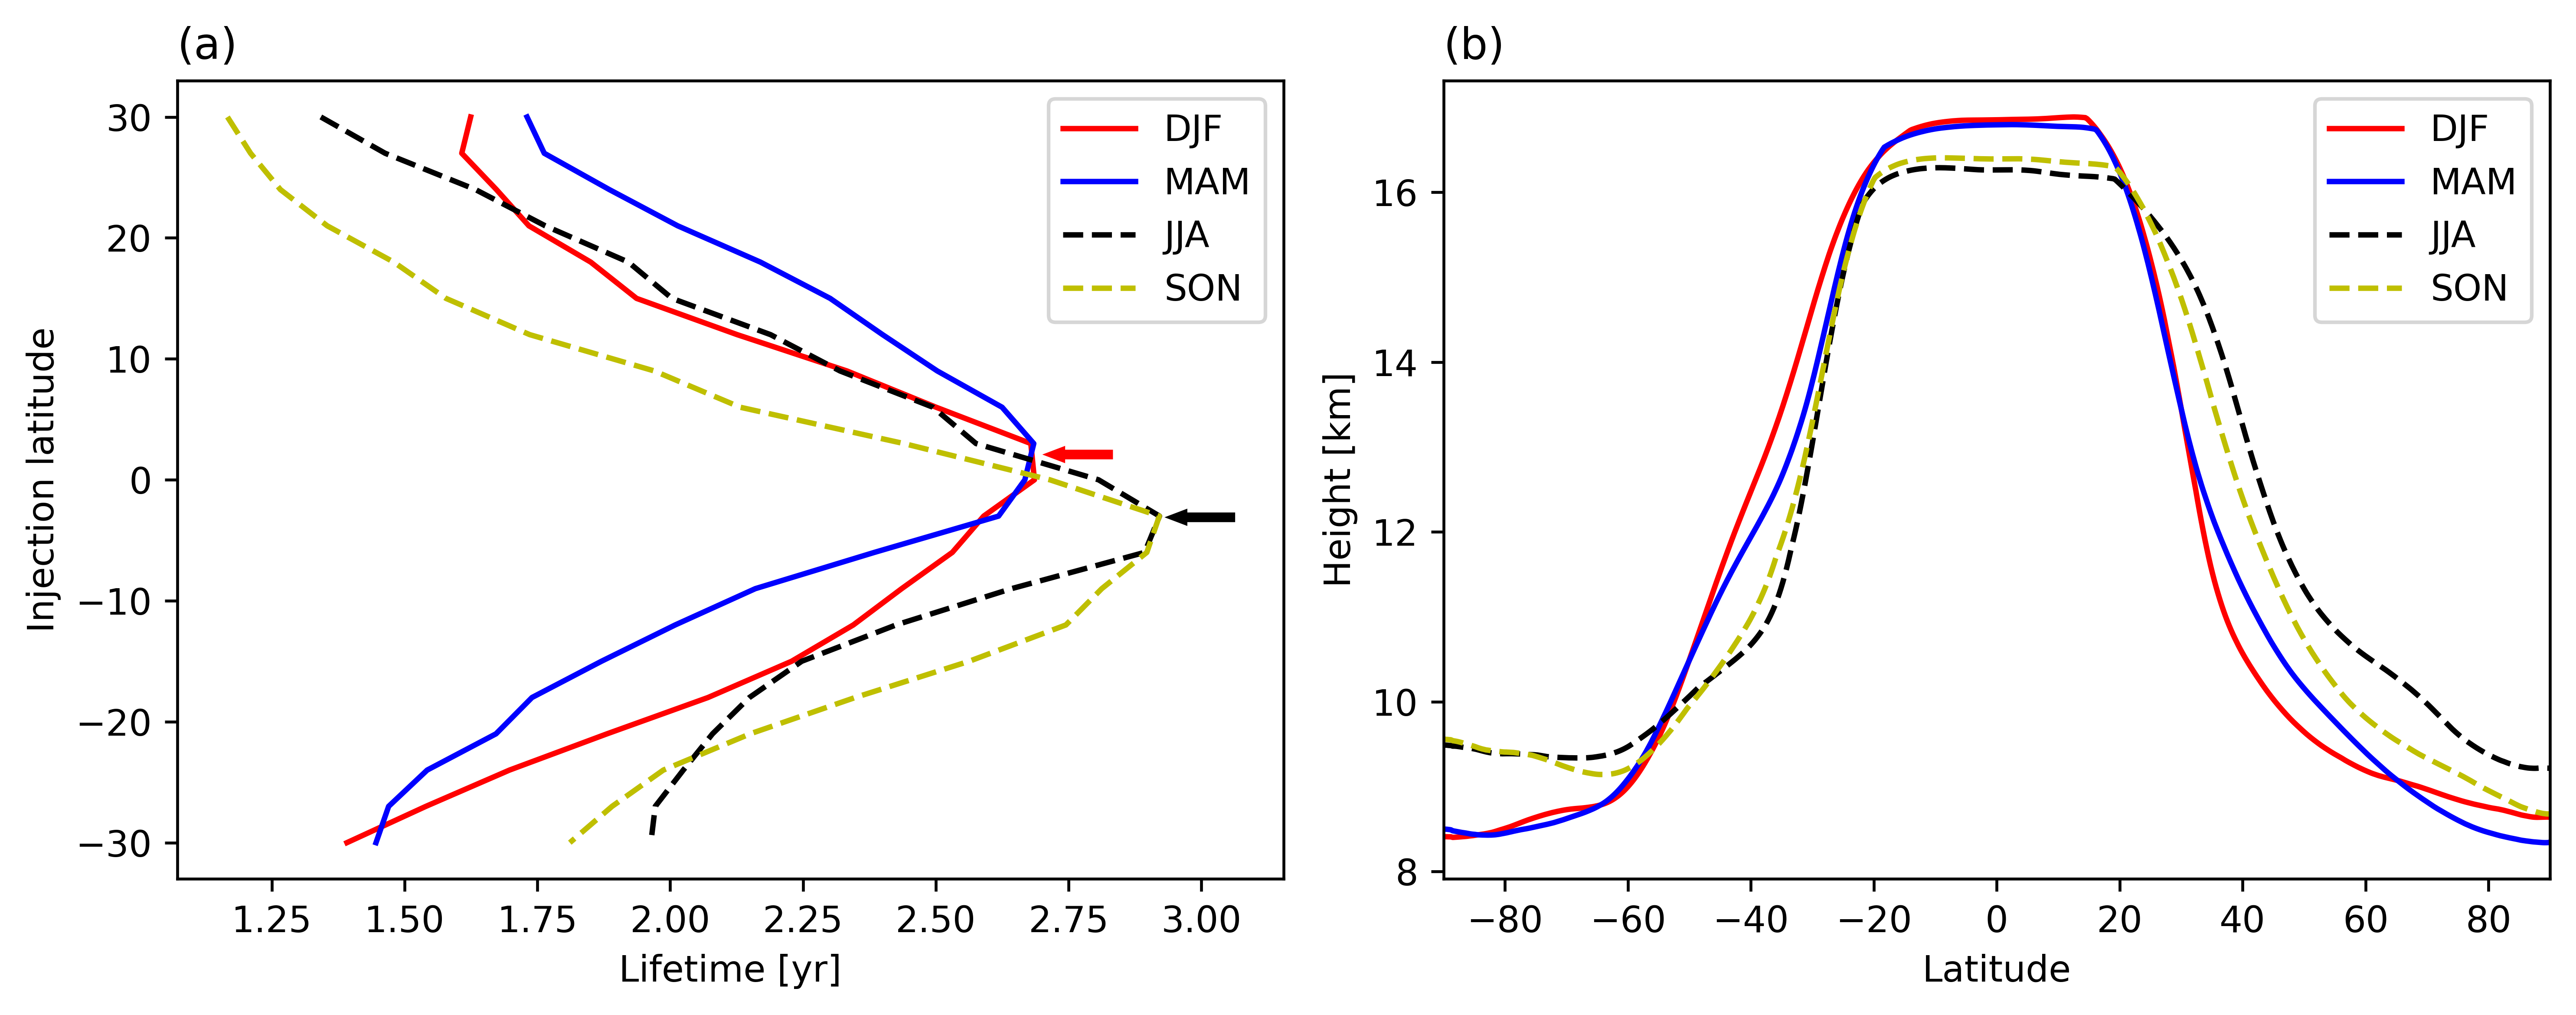

In [58]:
fig = plt.figure(figsize=(10,4), dpi=600)

###
ax1 = fig.add_subplot(1,2,1)
iz=3
ax1.plot(lifetime_season_zonal_mean[iz,:,0], LAT_1d, 'r-', label=f"DJF")
ax1.plot(lifetime_season_zonal_mean[iz,:,1], LAT_1d, 'b-', label=f"MAM")
ax1.plot(lifetime_season_zonal_mean[iz,:,2], LAT_1d, 'k--', label=f'JJA')
ax1.plot(lifetime_season_zonal_mean[iz,:,3], LAT_1d, 'y--', label=f'SON')

# ax1.plot(lifetime_season_zonal_mean[iz,:,0], LAT_1d, 'r-')
# ax1.plot(lifetime_season_zonal_mean[iz,:,2], LAT_1d, 'k--')

# ax1.annotate("", xy=(0.5, 0.5), xytext=(0, 0), arrowprops=dict(arrowstyle="->"))
ax1.arrow(x=2.83, y=2.09, dx=-0.12, dy=0, \
          width=.5, length_includes_head=0.12, \
          head_width = 1.0,head_length=0.03, \
          facecolor='red', edgecolor='red') 

ax1.arrow(x=3.06, y=-3.1, dx=-0.12, dy=0, \
          width=.5, length_includes_head=0.12, \
          head_width = 1.0,head_length=0.03, \
          facecolor='black', edgecolor='black') 

# ax1.set_title(f"{Height[iz]:.0f} km")
ax1.set_title("(a)", loc='left')
ax1.set_xlabel("Lifetime [yr]")
ax1.set_ylabel("Injection latitude")
ax1.legend();

###
ax2 = fig.add_subplot(1,2,2)

ax2.plot(lat, Z1, 'r-', label='DJF');
ax2.plot(lat, Z2, 'b-', label='MAM');
ax2.plot(lat, Z3, 'k--', label='JJA');
ax2.plot(lat, Z4, 'y--', label='SON');

ax2.set_xlim(-90,90)

ax2.set_title("(b)", loc='left')
ax2.set_xlabel("Latitude")
ax2.set_ylabel("Height [km]")
ax2.legend()

plt.tight_layout()

plt.savefig('Figure_2.jpg')

In [54]:

"MAM")
ax1.plot(lifetime_season_zonal_mean[iz,:,2], LAT_1d, 'k--', label=f'JJA')
ax1.plot(lifetime_season_zonal_mean[iz,:,3], LAT_1d, 'y--', label=f'SON'

SyntaxError: unmatched ')' (<ipython-input-54-3e5e87f106f8>, line 1)

In [ ]:
d = {'Lat_deg': lat.values, \
     'Tropopause_Height_DJF_km': Z1, \
     'Tropopause_Height_MAM_km': Z2, \
     'Tropopause_Height_JJA_km': Z3, \
     'Tropopause_Height_SON_km': Z4}

df = pd.DataFrame(data=d)

df.to_csv('Zonal_Mean_Tropopause_Height.csv');



In [ ]:
print(max(lifetime_season_zonal_mean[iz,:,2]))
print(max(lifetime_season_zonal_mean[iz,:,0]))

(max(lifetime_season_zonal_mean[iz,:,2])-max(lifetime_season_zonal_mean[iz,:,0]) )




In [ ]:
lifetime_season_zonal_mean[iz,:,2], max(lifetime_season_zonal_mean[iz,:,2])

## Meridional mean plot

In [ ]:
lifetime_season_meridion_mean = np.mean(lifetime_season_mean_new2[:,:,:,:]/365.25, axis=1)

fig = plt.figure(figsize=(10,6), dpi=100)


ax1 = fig.add_subplot(2,1,1)
iz=1
ax1.plot(LON_1d, lifetime_season_meridion_mean[iz,:,0], 'r-', label=f"DJF")
ax1.plot(LON_1d, lifetime_season_meridion_mean[iz,:,1], 'b-', label=f"MAM")
ax1.plot(LON_1d, lifetime_season_meridion_mean[iz,:,2], 'k-', label=f'JJA')
ax1.plot(LON_1d, lifetime_season_meridion_mean[iz,:,3], 'y-', label=f'SON')

ax1.set_title(f"{Height[iz]:.0f} km")
# ax1.set_xlabel("lifetime [yr]")
# ax1.set_xlabel("Lon")
ax1.legend(loc='upper right');


ax2 = fig.add_subplot(2,1,2)
iz=4
ax2.plot(LON_1d, lifetime_season_meridion_mean[iz,:,0], 'r--', label=f"DJF")
ax2.plot(LON_1d, lifetime_season_meridion_mean[iz,:,1], 'b--', label=f"MAM")
ax2.plot(LON_1d, lifetime_season_meridion_mean[iz,:,2], 'k--', label=f'JJA')
ax2.plot(LON_1d, lifetime_season_meridion_mean[iz,:,3], 'y--', label=f'SON')

ax2.set_title(f"{Height[iz]:.0f} km")
ax2.set_ylabel("lifetime [yr]")
ax2.set_xlabel("Lon")
ax2.legend(loc='upper right');

plt.tight_layout()

In [ ]:
fig = plt.figure(figsize=(10,6), dpi=100)


ax1 = fig.add_subplot(1,1,1)
iz=1
ax1.plot(LON_1d, lifetime_season_meridion_mean[iz,:,0], 'r-', label=f"DJF")
ax1.plot(LON_1d, lifetime_season_meridion_mean[iz,:,1], 'b-', label=f"MAM")
ax1.plot(LON_1d, lifetime_season_meridion_mean[iz,:,2], 'k-', label=f'JJA')
ax1.plot(LON_1d, lifetime_season_meridion_mean[iz,:,3], 'y-', label=f'SON')
ax1.set_title(f"{Height[iz]:.0f} km (solid)", loc='right')

iz=4
ax1.plot(LON_1d, lifetime_season_meridion_mean[iz,:,0], 'r--', label=f"DJF")
ax1.plot(LON_1d, lifetime_season_meridion_mean[iz,:,1], 'b--', label=f"MAM")
ax1.plot(LON_1d, lifetime_season_meridion_mean[iz,:,2], 'k--', label=f'JJA')
ax1.plot(LON_1d, lifetime_season_meridion_mean[iz,:,3], 'y--', label=f'SON')

ax1.set_title(f"{Height[iz]:.0f} km (dashed)", loc='left')
ax1.set_ylabel("lifetime [yr]")
ax1.set_xlabel("Lon")
ax1.legend(loc='center right');

plt.tight_layout()

# for paper 3: global tropopause height

In [97]:
### time mean
TROP01_tmean_z = TROP01_z.mean(dim=['time'])
TROP02_tmean_z = TROP02_z.mean(dim=['time'])
TROP03_tmean_z = TROP03_z.mean(dim=['time'])
TROP04_tmean_z = TROP04_z.mean(dim=['time'])
TROP05_tmean_z = TROP05_z.mean(dim=['time'])
TROP06_tmean_z = TROP06_z.mean(dim=['time'])
TROP07_tmean_z = TROP07_z.mean(dim=['time'])
TROP08_tmean_z = TROP08_z.mean(dim=['time'])
TROP09_tmean_z = TROP09_z.mean(dim=['time'])
TROP10_tmean_z = TROP10_z.mean(dim=['time'])
TROP11_tmean_z = TROP11_z.mean(dim=['time'])
TROP12_tmean_z = TROP12_z.mean(dim=['time'])

TROP01_tmean_dyn = TROP01_dyn.mean(dim=['time'])
TROP02_tmean_dyn = TROP02_dyn.mean(dim=['time'])
TROP03_tmean_dyn = TROP03_dyn.mean(dim=['time'])
TROP04_tmean_dyn = TROP04_dyn.mean(dim=['time'])
TROP05_tmean_dyn = TROP05_dyn.mean(dim=['time'])
TROP06_tmean_dyn = TROP06_dyn.mean(dim=['time'])
TROP07_tmean_dyn = TROP07_dyn.mean(dim=['time'])
TROP08_tmean_dyn = TROP08_dyn.mean(dim=['time'])
TROP09_tmean_dyn = TROP09_dyn.mean(dim=['time'])
TROP10_tmean_dyn = TROP10_dyn.mean(dim=['time'])
TROP11_tmean_dyn = TROP11_dyn.mean(dim=['time'])
TROP12_tmean_dyn = TROP12_dyn.mean(dim=['time'])

TROP12_tmean_dyn

<xarray.DataArray 'dyn_z' (lat: 601, lon: 1200)>
array([[8.75971  , 8.758876 , 8.759913 , ..., 8.758919 , 8.7600975,
        8.75942  ],
       [8.758212 , 8.757292 , 8.758244 , ..., 8.757654 , 8.758765 ,
        8.758006 ],
       [8.7563715, 8.75542  , 8.756336 , ..., 8.755886 , 8.756977 ,
        8.756193 ],
       ...,
       [8.727928 , 8.728176 , 8.727905 , ..., 8.728061 , 8.727631 ,
        8.727495 ],
       [8.727696 , 8.72796  , 8.727703 , ..., 8.727775 , 8.7273655,
        8.727247 ],
       [8.72805  , 8.728298 , 8.728026 , ..., 8.7281685, 8.727747 ,
        8.727615 ]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -180.0 -179.7 -179.4 -179.1 ... 179.1 179.4 179.7
  * lat      (lat) float64 -90.0 -89.7 -89.4 -89.1 -88.8 ... 89.1 89.4 89.7 90.0

In [98]:
H1 = np.minimum((TROP12_tmean_z[:,:]+TROP01_tmean_z[:,:]+TROP02_tmean_z[:,:])/3.0, \
         (TROP12_tmean_dyn[:,:]+TROP01_tmean_dyn[:,:]+TROP02_tmean_dyn[:,:])/3.0)

H2 = np.minimum((TROP03_tmean_z[:,:]+TROP04_tmean_z[:,:]+TROP05_tmean_z[:,:])/3.0, \
         (TROP03_tmean_dyn[:,:]+TROP04_tmean_dyn[:,:]+TROP05_tmean_dyn[:,:])/3.0)

H3 = np.minimum((TROP06_tmean_z[:,:]+TROP07_tmean_z[:,:]+TROP08_tmean_z[:,:])/3.0, \
         (TROP06_tmean_dyn[:,:]+TROP07_tmean_dyn[:,:]+TROP08_tmean_dyn[:,:])/3.0)

H4 = np.minimum((TROP09_tmean_z[:,:]+TROP10_tmean_z[:,:]+TROP11_tmean_z[:,:])/3.0, \
         (TROP09_tmean_dyn[:,:]+TROP10_tmean_dyn[:,:]+TROP11_tmean_dyn[:,:])/3.0)

In [95]:
lat.values

array([-9.00000000e+01, -8.97000000e+01, -8.94000000e+01, -8.91000000e+01,
       -8.88000000e+01, -8.85000000e+01, -8.82000000e+01, -8.79000000e+01,
       -8.76000000e+01, -8.73000000e+01, -8.70000000e+01, -8.67000000e+01,
       -8.64000000e+01, -8.61000000e+01, -8.58000000e+01, -8.55000000e+01,
       -8.52000000e+01, -8.49000000e+01, -8.46000000e+01, -8.43000000e+01,
       -8.40000000e+01, -8.37000000e+01, -8.34000000e+01, -8.31000000e+01,
       -8.28000000e+01, -8.25000000e+01, -8.22000000e+01, -8.19000000e+01,
       -8.16000000e+01, -8.13000000e+01, -8.10000000e+01, -8.07000000e+01,
       -8.04000000e+01, -8.01000000e+01, -7.98000000e+01, -7.95000000e+01,
       -7.92000000e+01, -7.89000000e+01, -7.86000000e+01, -7.83000000e+01,
       -7.80000000e+01, -7.77000000e+01, -7.74000000e+01, -7.71000000e+01,
       -7.68000000e+01, -7.65000000e+01, -7.62000000e+01, -7.59000000e+01,
       -7.56000000e+01, -7.53000000e+01, -7.50000000e+01, -7.47000000e+01,
       -7.44000000e+01, -

In [105]:
ds = xr.Dataset(
    {"Tropopause_Height_DJF_km": (("lat", "lon"), H1),\
    "Tropopause_Height_MAM_km": (("lat", "lon"), H2),\
    "Tropopause_Height_JJA_km": (("lat", "lon"), H3),\
    "Tropopause_Height_SON_km": (("lat", "lon"), H4)},
    coords={
        "lon": lon.values,
        "lat": lat.values,
    },
    )


ds.to_netcdf("Global_Tropopause_Height.nc")